# Загрузка библиотек и датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge


import joblib



In [2]:
path = "data/Concrete_Data.xls"

In [3]:
data = pd.read_excel(path)

# Обзор данных

In [4]:
data

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [5]:
data.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

#  Описательная статистика характеристик бетона

| Переменная | Минимальное | Максимальное | Среднее | Медиана | Стандартное отклонение |
|------------|-------------|-------------|---------|---------|----------------------|
| **Цемент (кг/м³)** | 102.00 | 540.00 | 281.17 | 272.90 | 104.51 |
| **Шлак (кг/м³)** | 0.00 | 359.40 | 73.90 | 22.00 | 86.28 |
| **Зола-унос (кг/м³)** | 0.00 | 200.10 | 54.19 | 0.00 | 64.00 |
| **Вода (кг/м³)** | 121.75 | 247.00 | 181.57 | 185.00 | 21.36 |
| **Пластификатор (кг/м³)** | 0.00 | 32.20 | 6.20 | 6.35 | 5.97 |
| **Крупный заполнитель (кг/м³)** | 801.00 | 1145.00 | 972.92 | 968.00 | 77.75 |
| **Мелкий заполнитель (кг/м³)** | 594.00 | 992.60 | 773.58 | 779.51 | 80.18 |
| **Возраст (дни)** | 1.00 | 365.00 | 45.66 | 28.00 | 63.17 |
| **Прочность на сжатие (МПа)** | 2.33 | 82.60 | 35.82 | 34.44 | 16.71 |



In [9]:
data["Concrete compressive strength(MPa, megapascals) "].describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [11]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Нет пропусков

In [12]:
data.duplicated().sum()

np.int64(25)

In [13]:
# Показать все вхождения дубликатов
all_duplicates = data[data.duplicated(keep=False)]
print("\nВсе дубликаты (включая первое вхождение):")
all_duplicates


Все дубликаты (включая первое вхождение):


Cement (component 1)(kg in a m^3 mixture)  \
72                                       425.0   
77                                       425.0   
80                                       425.0   
83                                       362.6   
86                                       362.6   
88                                       362.6   
91                                       362.6   
95                                       425.0   
100                                      425.0   
103                                      425.0   
106                                      362.6   
109                                      362.6   
111                                      362.6   
118                                      425.0   
123                                      425.0   
126                                      425.0   
129                                      362.6   
132                                      362.6   
134                                      362.6   
137                                      362.6   
141                                      425.0   
146                                      425.0   
149                                      425.0   
152                                      362.6   
155                                      362.6   
157                                      362.6   
160                                      362.6   
164                                      425.0   
169                                      425.0   
172                                      425.0   
175                                      362.6   
177                                      362.6   
179                                      362.6   
182                                      362.6   
801                                      252.0   
809                                      252.0   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
72                                               106.3       
77                                               106.3       
80                                               106.3       
83                                               189.0       
86                                               189.0       
88                                               189.0       
91                                               189.0       
95                                               106.3       
100                                              106.3       
103                                              106.3       
106                                              189.0       
109                                              189.0       
111                                              189.0       
118                                              106.3       
123                                              106.3       
126                                              106.3       
129                                              189.0       
132                                              189.0       
134                                              189.0       
137                                              189.0       
141                                              106.3       
146                                              106.3       
149                                              106.3       
152                                              189.0       
155                                              189.0       
157                                              189.0       
160                                              189.0       
164                                              106.3       
169                                              106.3       
172                                              106.3       
175                                              189.0       
177                                              189.0       
179                                              189.0       
182                                           

In [14]:
data = data.drop_duplicates()
data

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [15]:
def remove_all_outliers_iqr(data):
    """
    Удаляет выбросы по всем числовым колонкам используя метод IQR
    """
    original_size = len(data)
    
    # Выбираем только числовые колонки
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    
    print(f"Анализируем {len(numeric_columns)} числовых колонок...")
    
    # Находим индексы выбросов для каждой колонки
    all_outliers_indices = set()
    
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Находим выбросы для текущей колонки
        column_outliers = data[
            (data[column] < lower_bound) | 
            (data[column] > upper_bound)
        ].index
        
        all_outliers_indices.update(column_outliers)
        
        print(f"{column}: {len(column_outliers)} выбросов")
    
    # Удаляем все строки, содержащие выбросы в любой колонке
    data_clean = data[~data.index.isin(all_outliers_indices)].copy()
    
    print(f"\nРезультат:")
    print(f"Исходный размер: {original_size}")
    print(f"Найдено выбросов: {len(all_outliers_indices)}")
    print(f"Очищенный размер: {len(data_clean)}")
    print(f"Удалено строк: {original_size - len(data_clean)}")
    
    return data_clean

# Использование
# data = remove_all_outliers_iqr(data)

# Разведочный анализ данных

## Визуализируем распредление целевой переменной

In [16]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [17]:
data.shape

(1005, 9)

In [18]:
def scott_rule(X):
    n = len(X)
    sigma = np.std(X)
    bin_width = 3.5 * sigma / (n ** (1/3))
    bins = int(np.ceil((max(X) - min(X)) / bin_width))
    return bins

bins_scott = scott_rule(data["Concrete compressive strength(MPa, megapascals) "])
print(f"Правило Скотта: {bins_scott} бинов")

Правило Скотта: 15 бинов


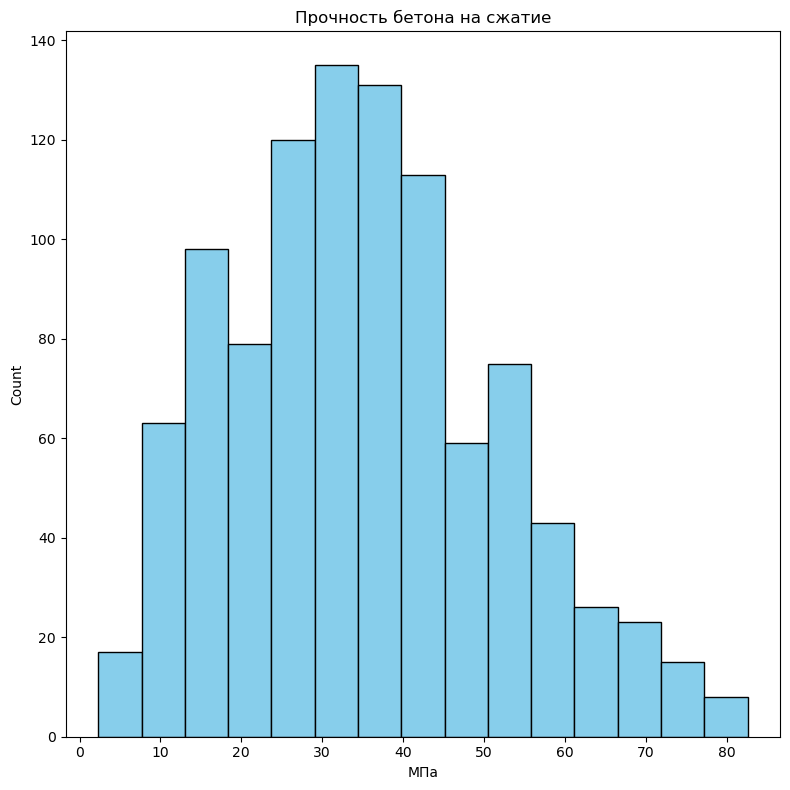

In [19]:
# Plotting our data
plt.figure(figsize=(8, 8))

# Histogram 
plt.hist(data['Concrete compressive strength(MPa, megapascals) '], bins=15, color="skyblue", edgecolor="black")
plt.title("Прочность бетона на сжатие")
plt.xlabel("МПа")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

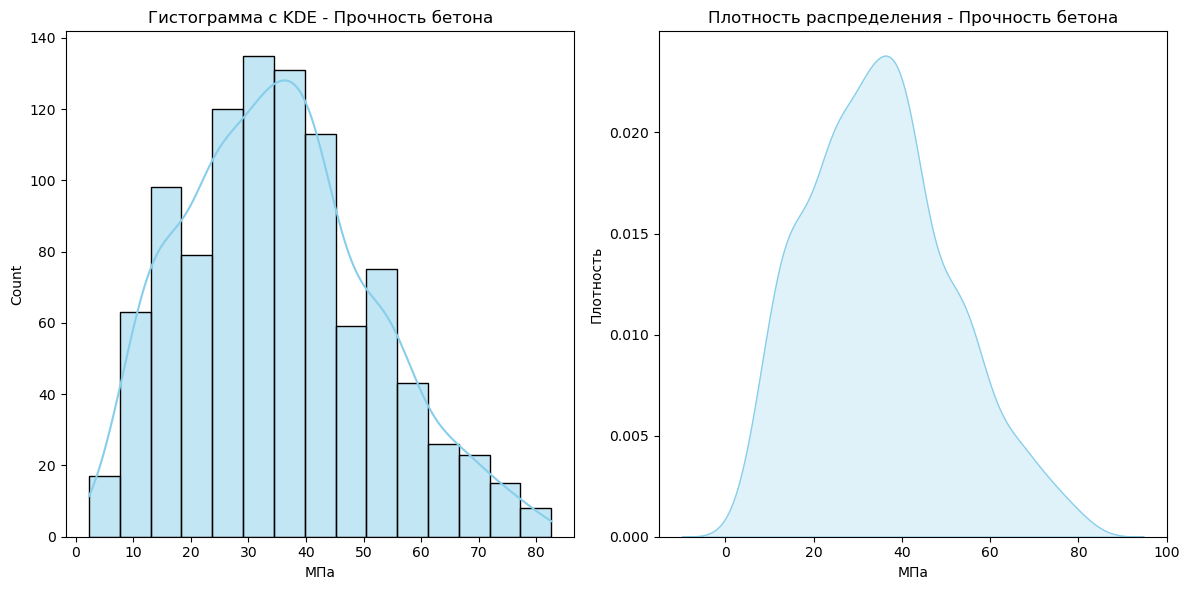

In [20]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

# Гистограмма с KDE через seaborn
plt.subplot(1, 2, 1)
sns.histplot(data['Concrete compressive strength(MPa, megapascals) '], bins=15, kde=True, color="skyblue")
plt.title("Гистограмма с KDE - Прочность бетона")
plt.xlabel("МПа")
plt.ylabel("Count")

# Плотность распределения
plt.subplot(1, 2, 2)
sns.kdeplot(data['Concrete compressive strength(MPa, megapascals) '], fill=True, color="skyblue")
plt.title("Плотность распределения - Прочность бетона")
plt.xlabel("МПа")
plt.ylabel("Плотность")

plt.tight_layout()
plt.show()

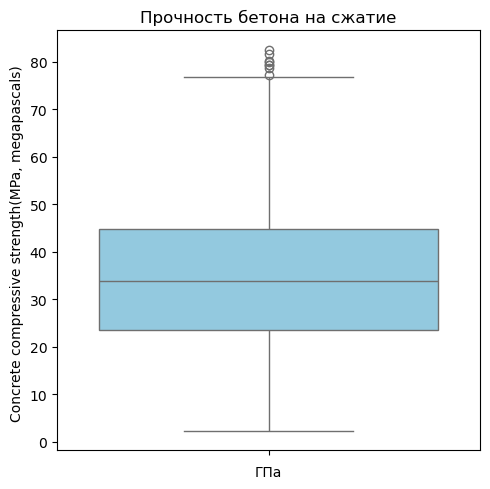

In [21]:
# Plotting our data
plt.figure(figsize=(5, 5))

# Boxplot

sns.boxplot(data['Concrete compressive strength(MPa, megapascals) '], color="skyblue")
plt.title("Прочность бетона на сжатие")
plt.xlabel("ГПа")


plt.tight_layout()
plt.show()

In [22]:
data['Concrete compressive strength(MPa, megapascals) '].describe()

count    1005.000000
mean       35.250273
std        16.284808
min         2.331808
25%        23.523542
50%        33.798114
75%        44.868340
max        82.599225
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

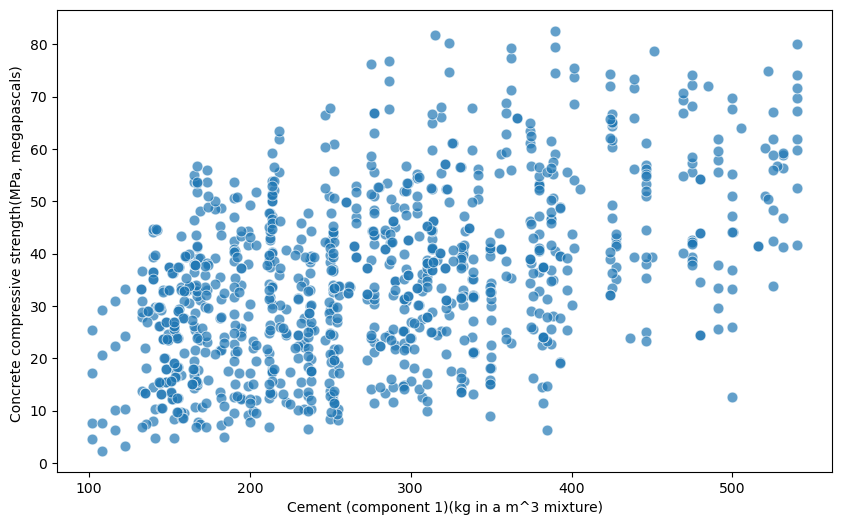

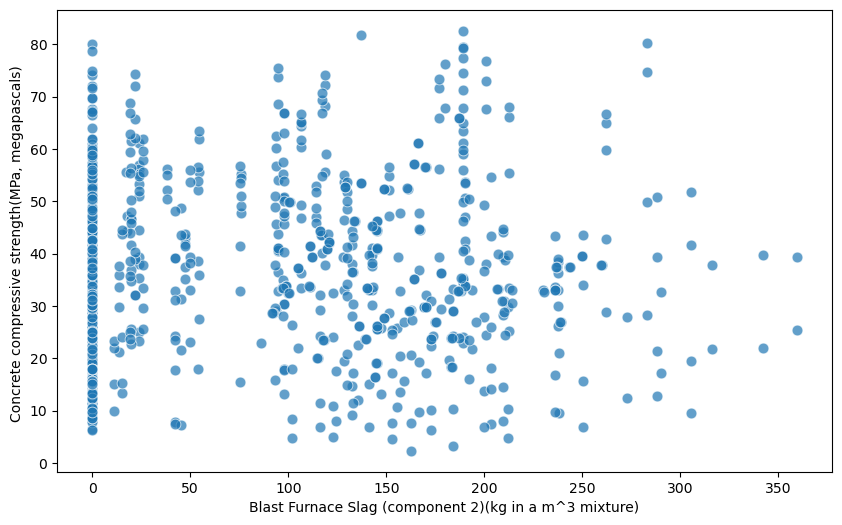

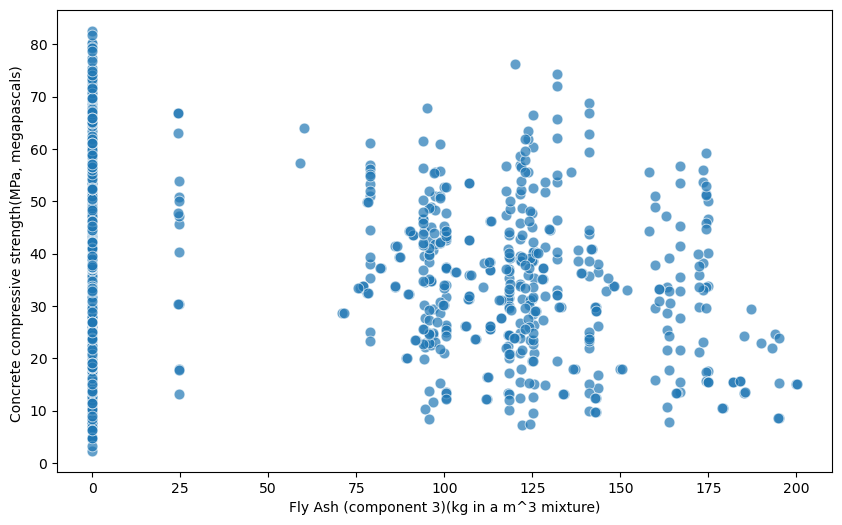

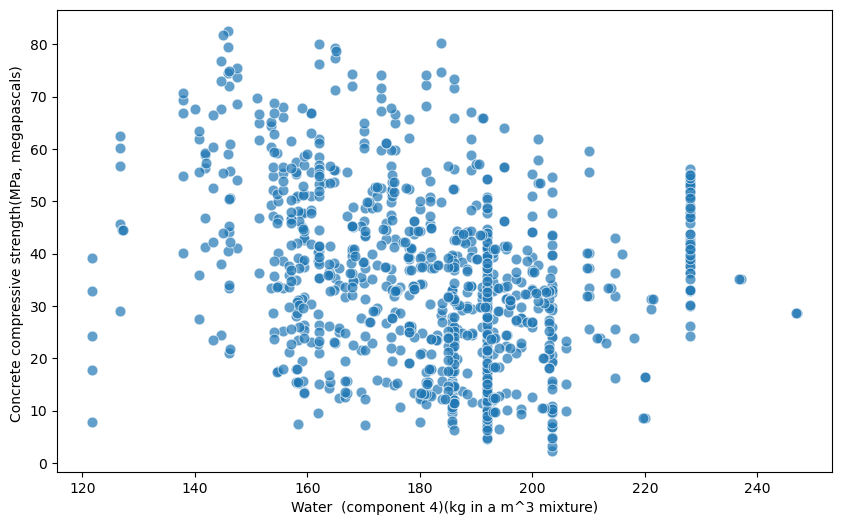

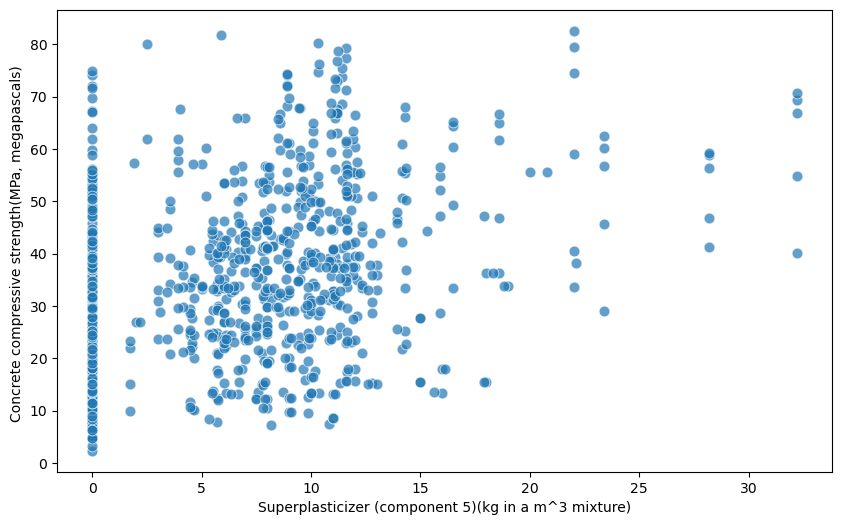

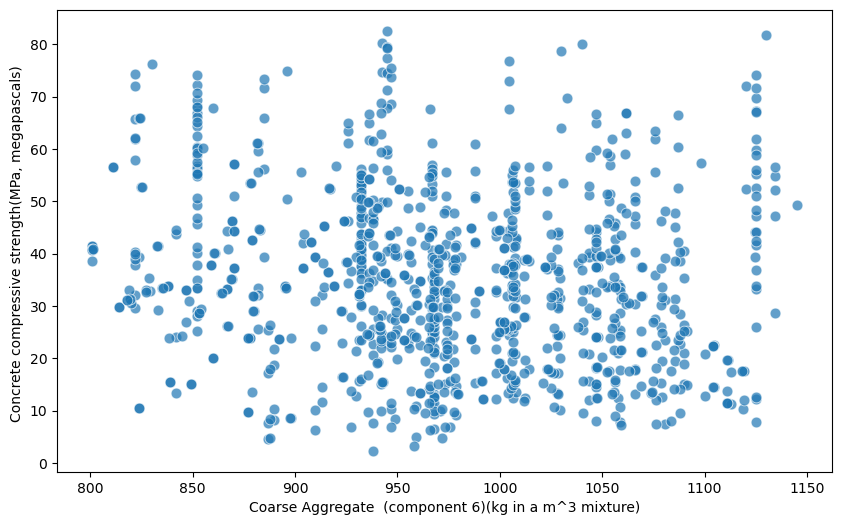

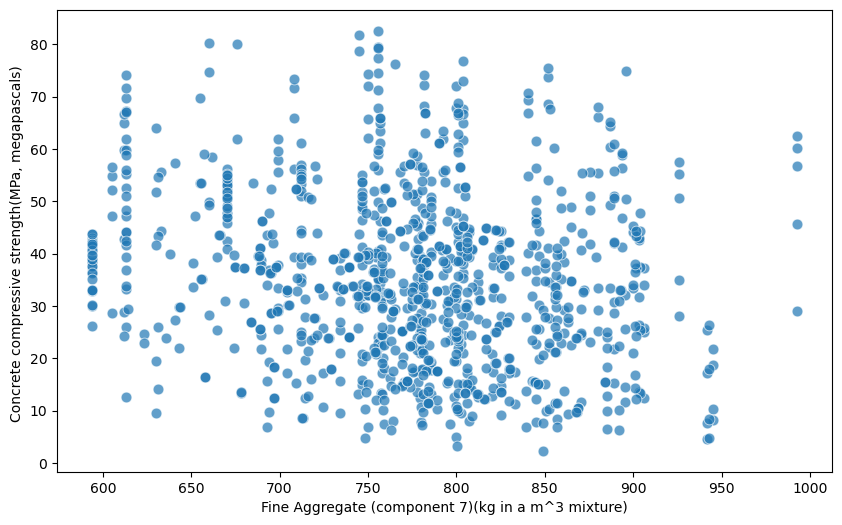

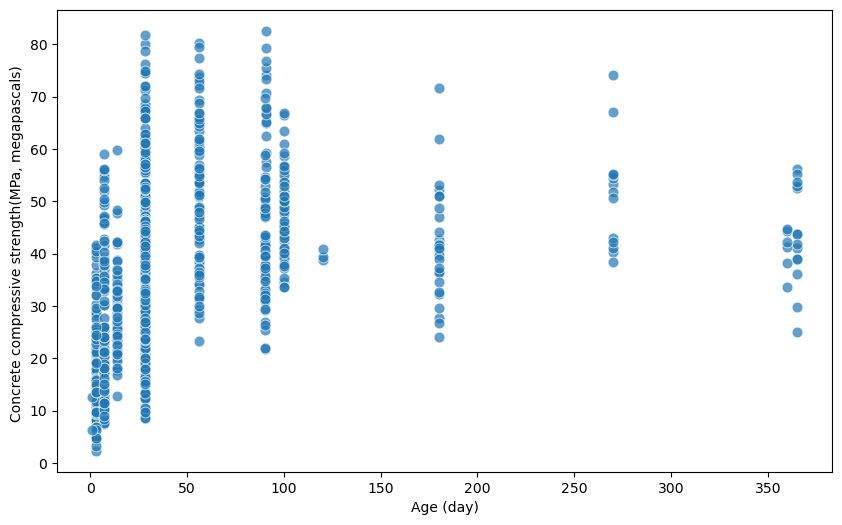

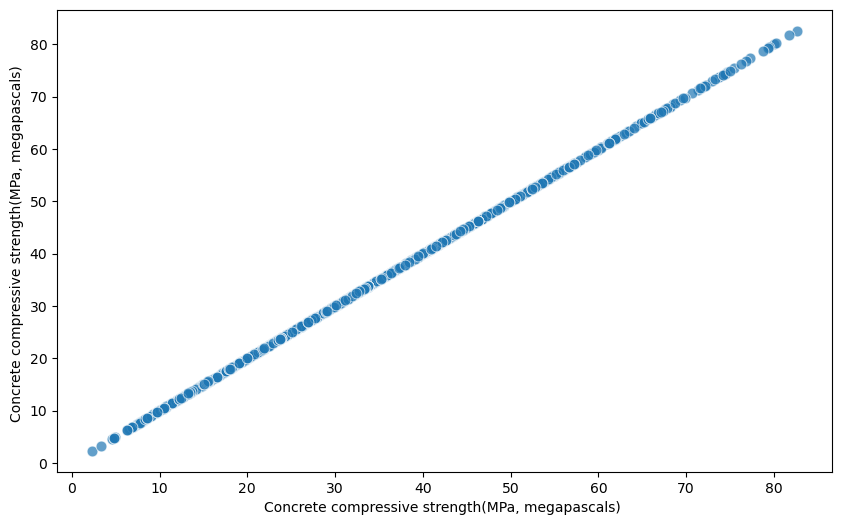

In [23]:
for column in data.columns:
    # Более красивый вариант с Seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, 
                    x=column, 
                    y=data["Concrete compressive strength(MPa, megapascals) "],
                    alpha=0.7, s=60)
    plt.title("")
    plt.show()

In [24]:
data["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"].describe()

count    1005.000000
mean       72.043134
std        86.170555
min         0.000000
25%         0.000000
50%        20.000000
75%       142.500000
max       359.400000
Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), dtype: float64

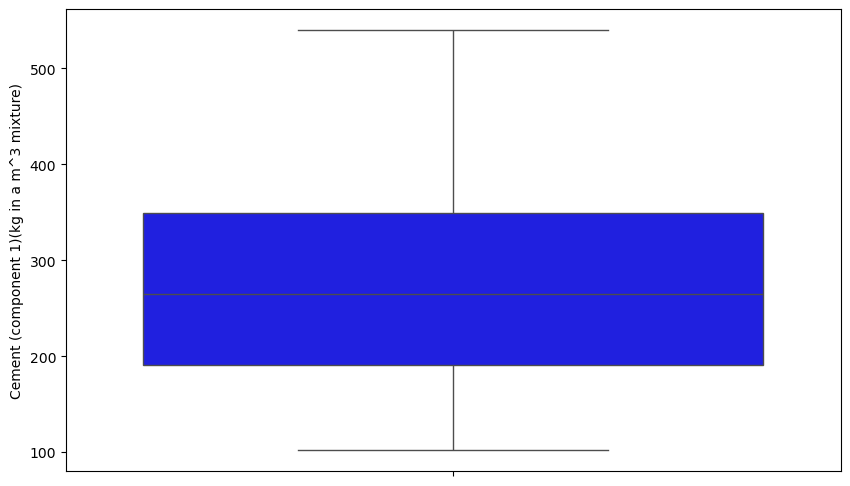

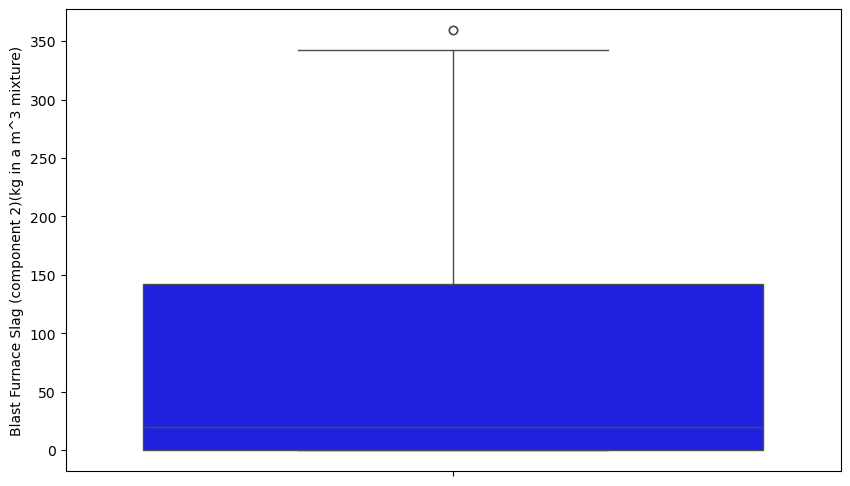

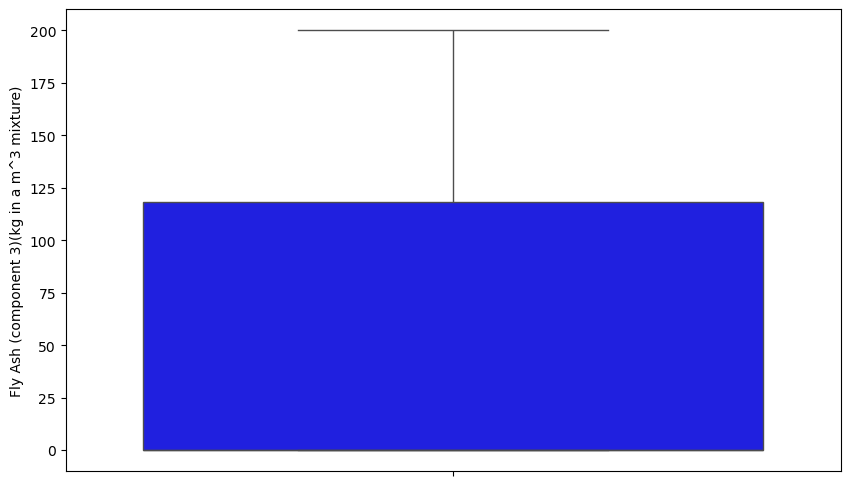

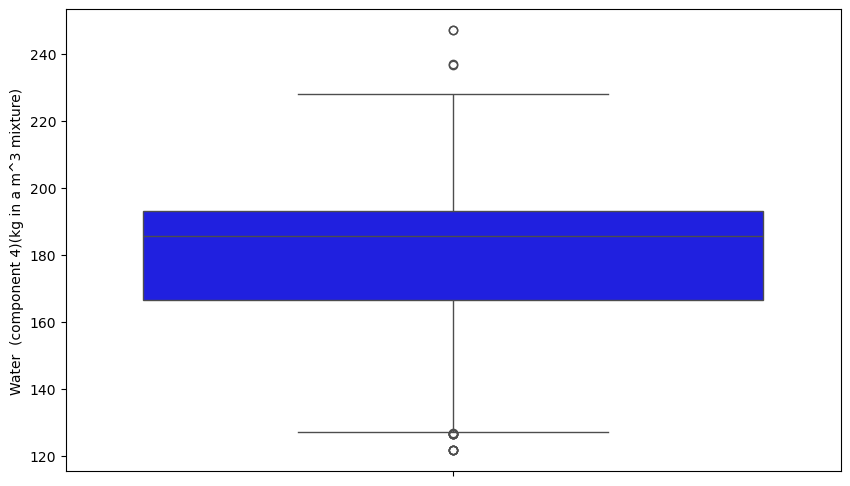

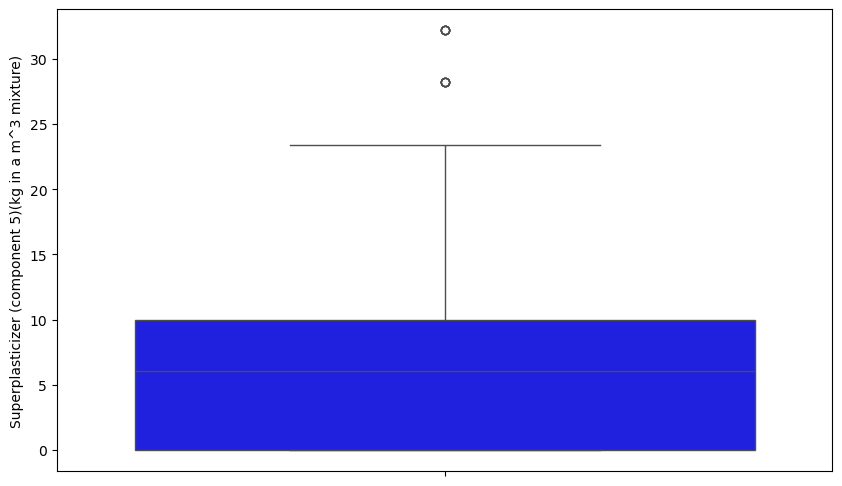

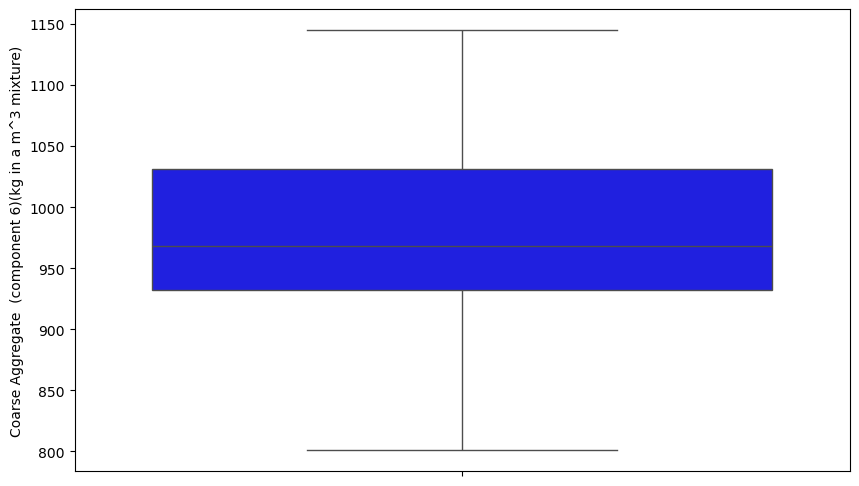

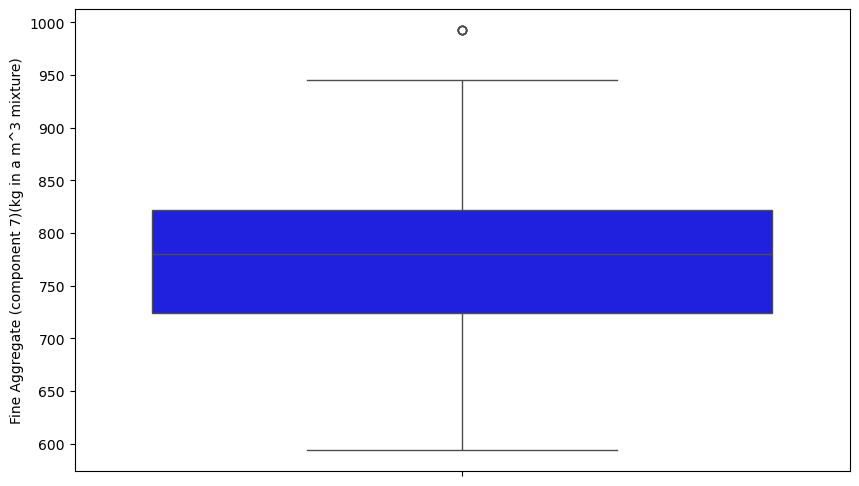

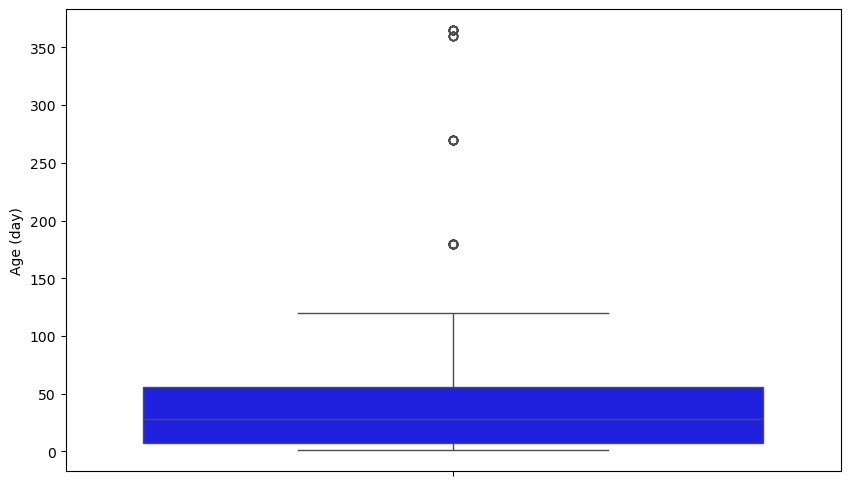

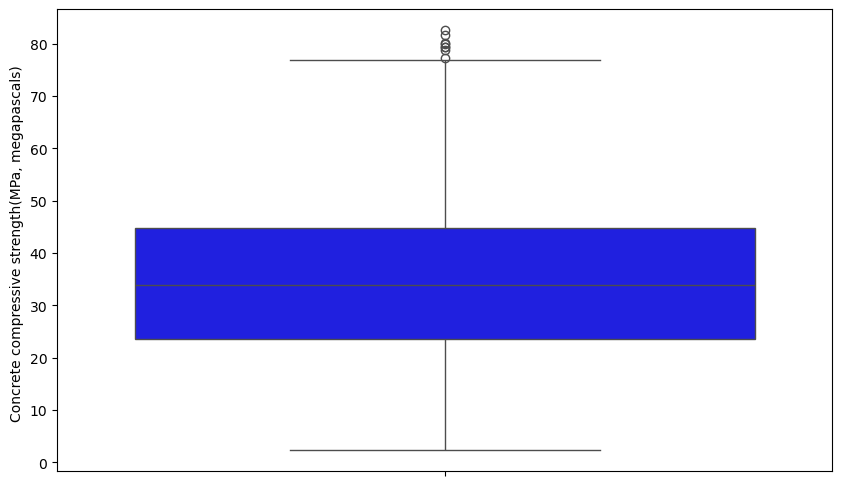

In [25]:
for column in data.columns:
    # Более красивый вариант с Seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[column],color="blue" )
    plt.title("")
    plt.show()

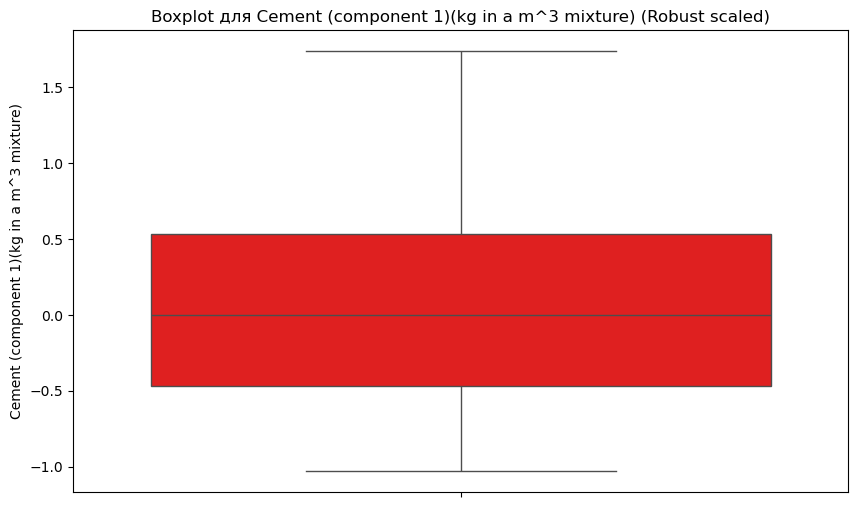

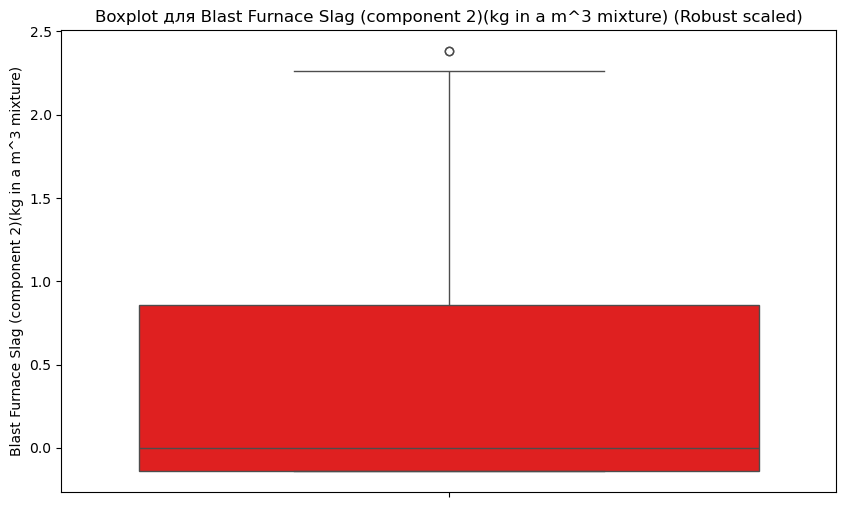

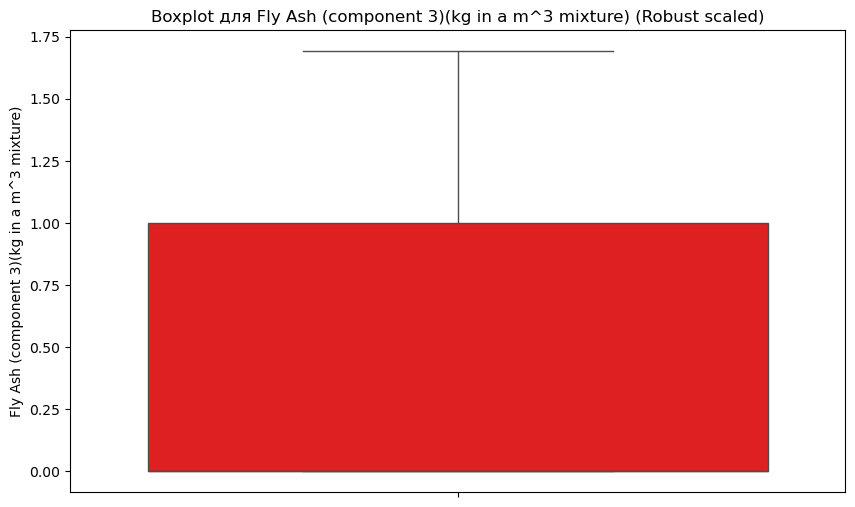

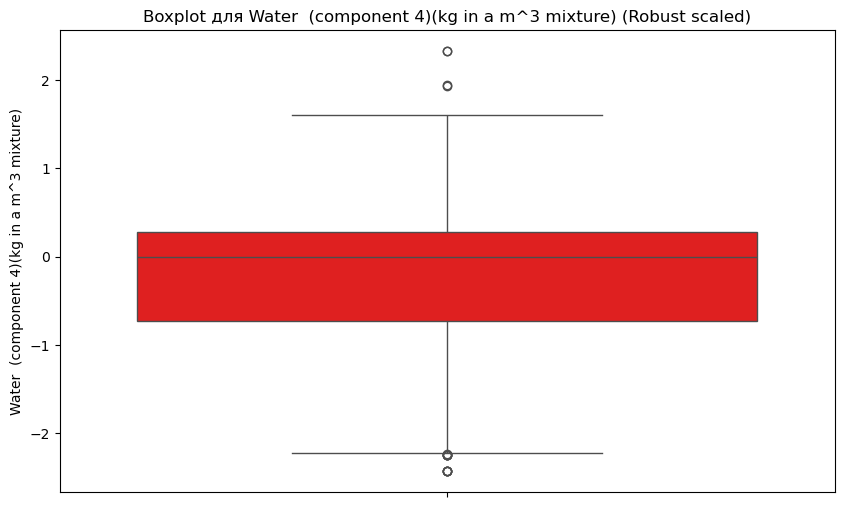

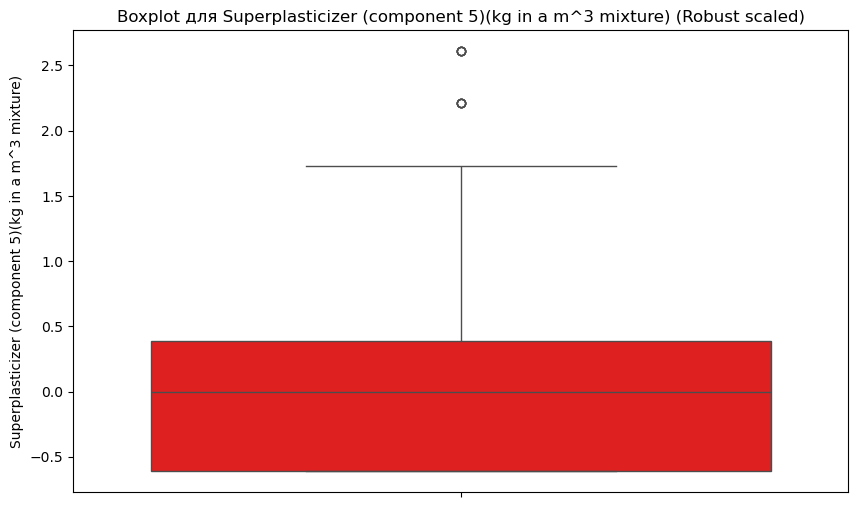

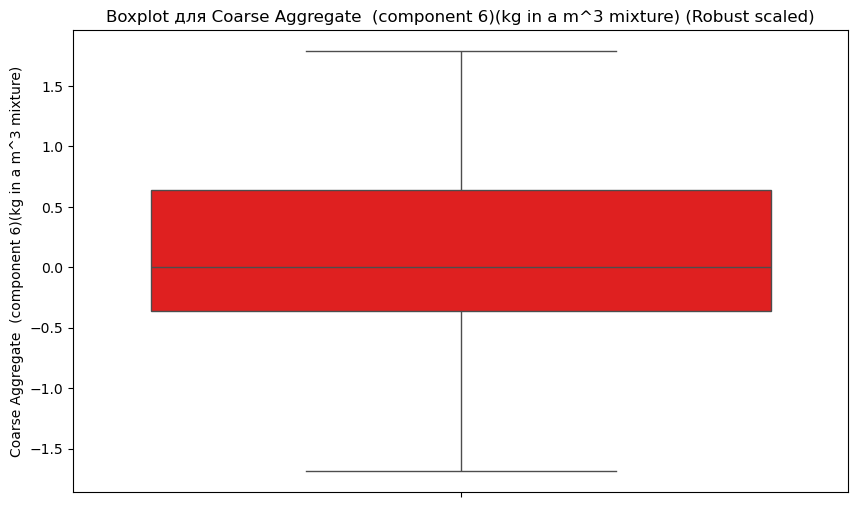

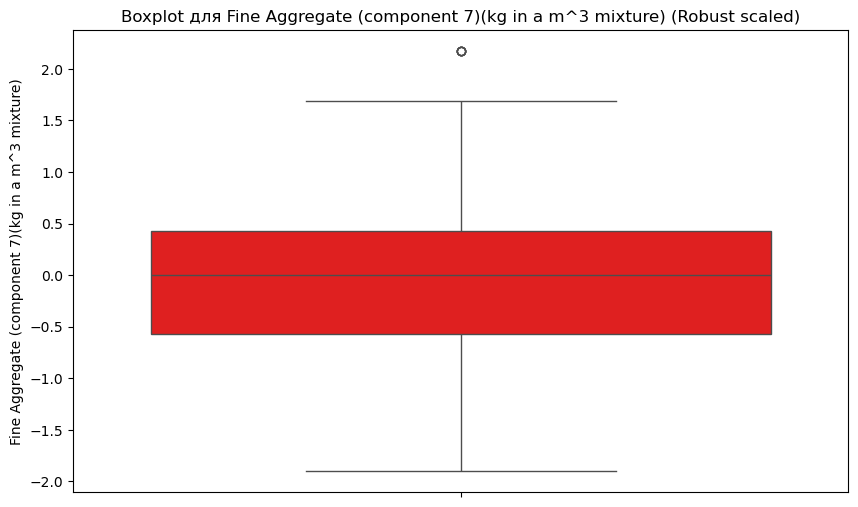

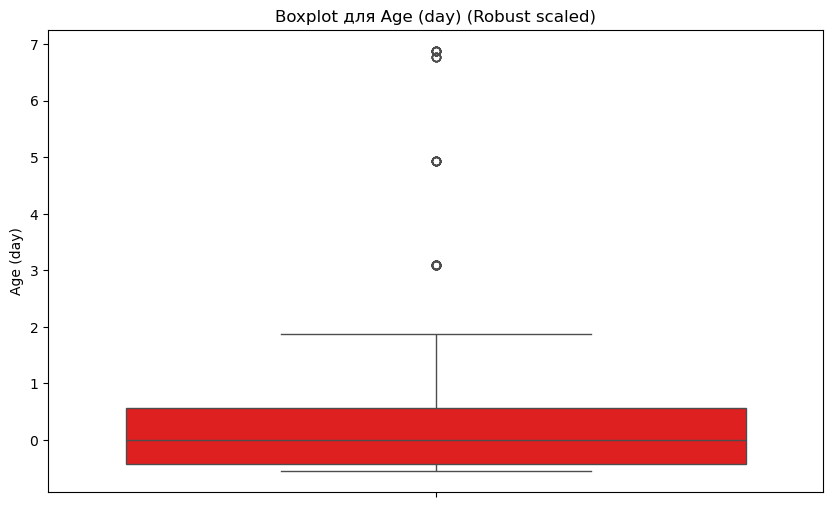

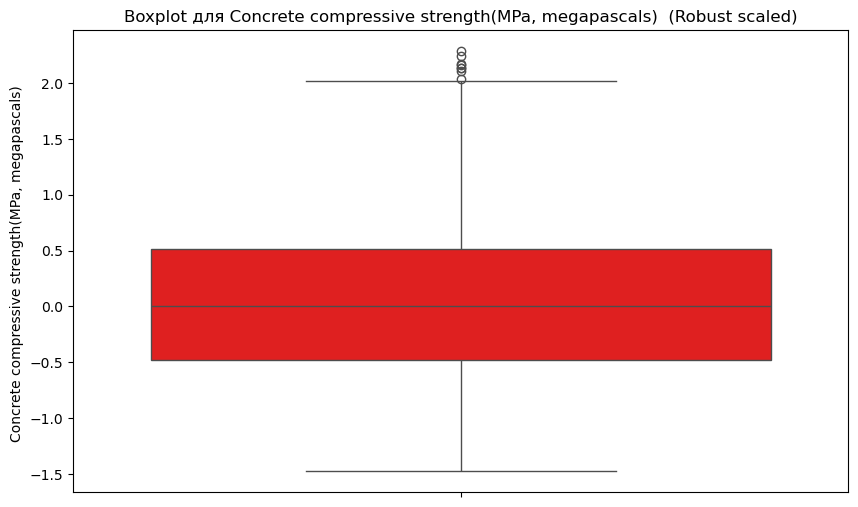

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd

def plot_scaled_boxplots(data, scaler_type='standard'):
    """
    Строит boxplot'ы для скалированных признаков
    
    Parameters:
    data: исходный DataFrame
    scaler_type: тип скейлера ('standard', 'minmax', 'robust')
    """
    
    # Выбираем скейлер
    if scaler_type == 'Standard':
        scaler = StandardScaler()
    elif scaler_type == 'MinMax':
        scaler = MinMaxScaler()
    elif scaler_type == 'Robust':
        scaler = RobustScaler()
    else:
        raise ValueError("scaler_type должен быть 'standard', 'minmax' или 'robust'")
    
    # Применяем scaling
    scaled_data = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
    
    # Строим boxplot'ы
    for column in scaled_df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=scaled_df[column], color="red")
        plt.title(f"Boxplot для {column} ({scaler_type} scaled)")
        plt.show()

# Использование
# plot_scaled_boxplots(data, scaler_type='Standard')
# plot_scaled_boxplots(data, scaler_type='MinMax')
plot_scaled_boxplots(data, scaler_type='Robust')

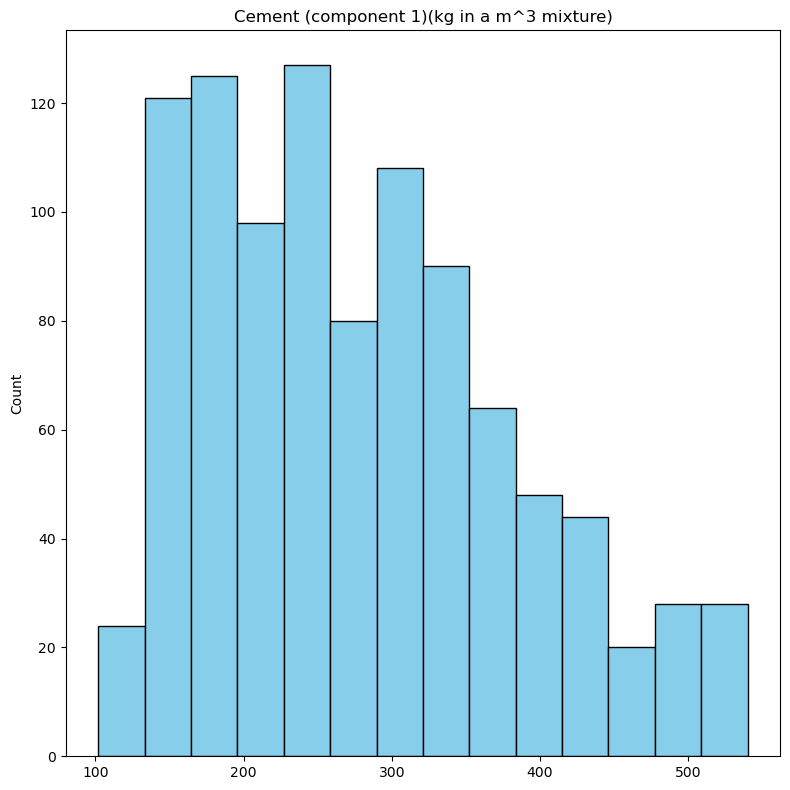

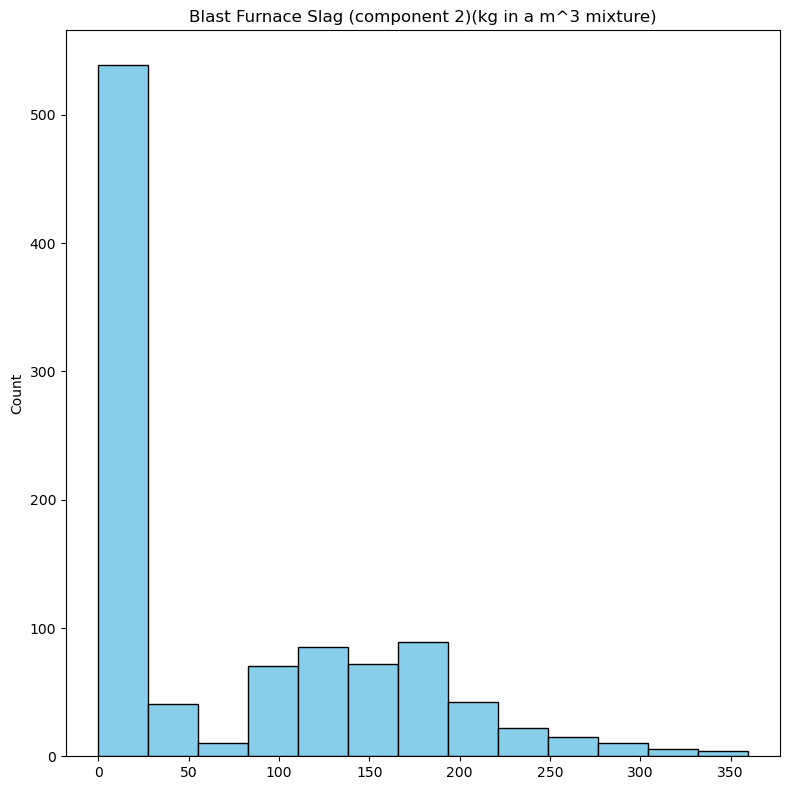

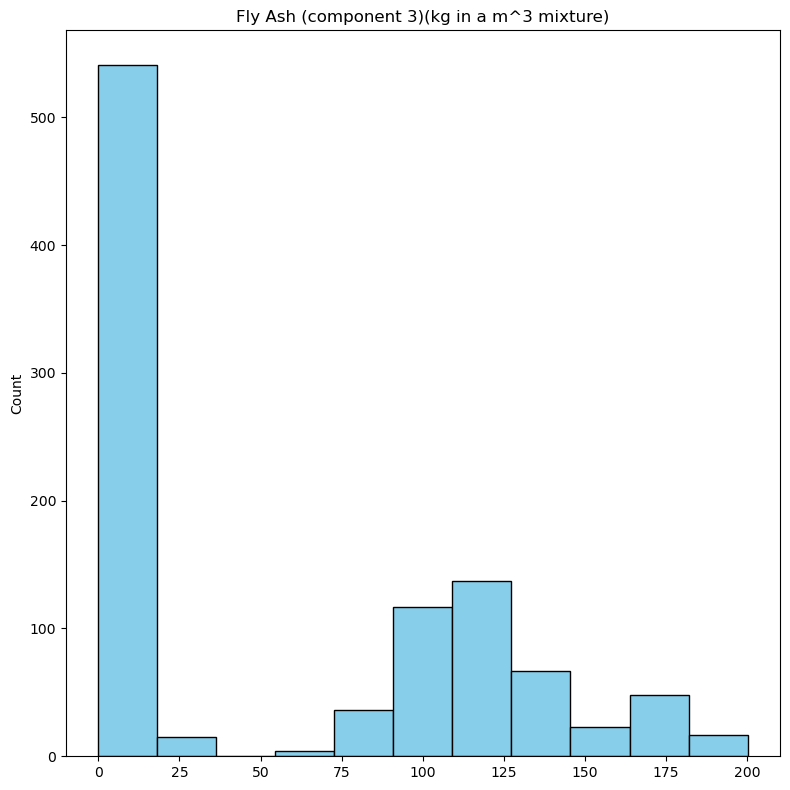

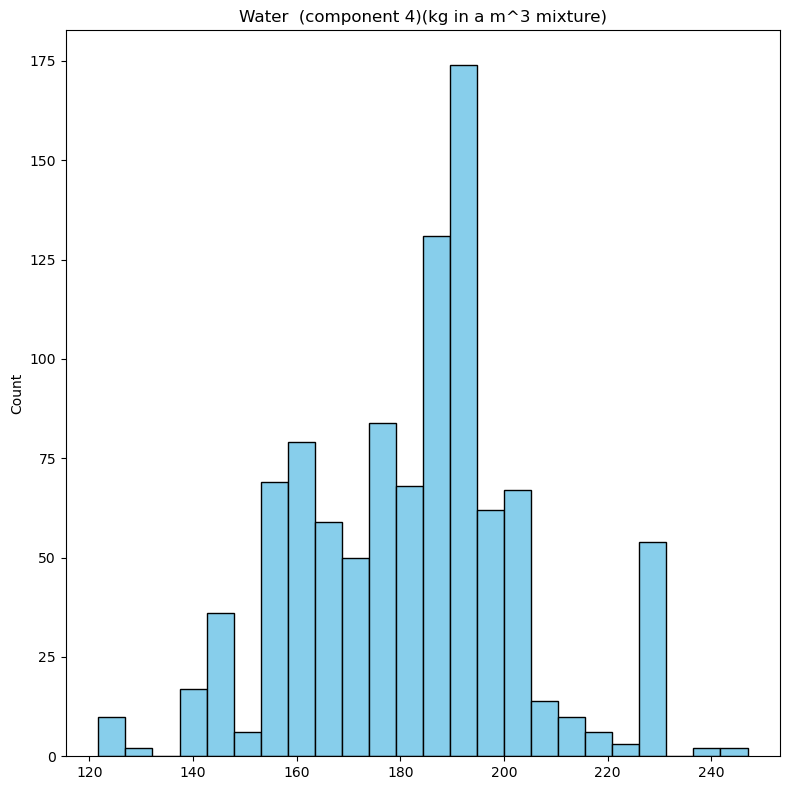

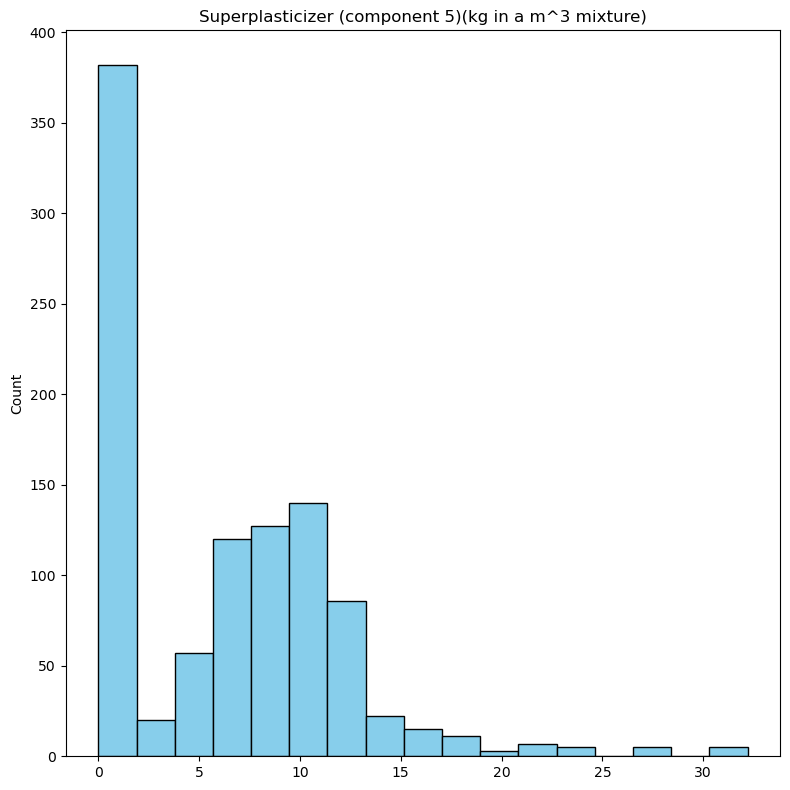

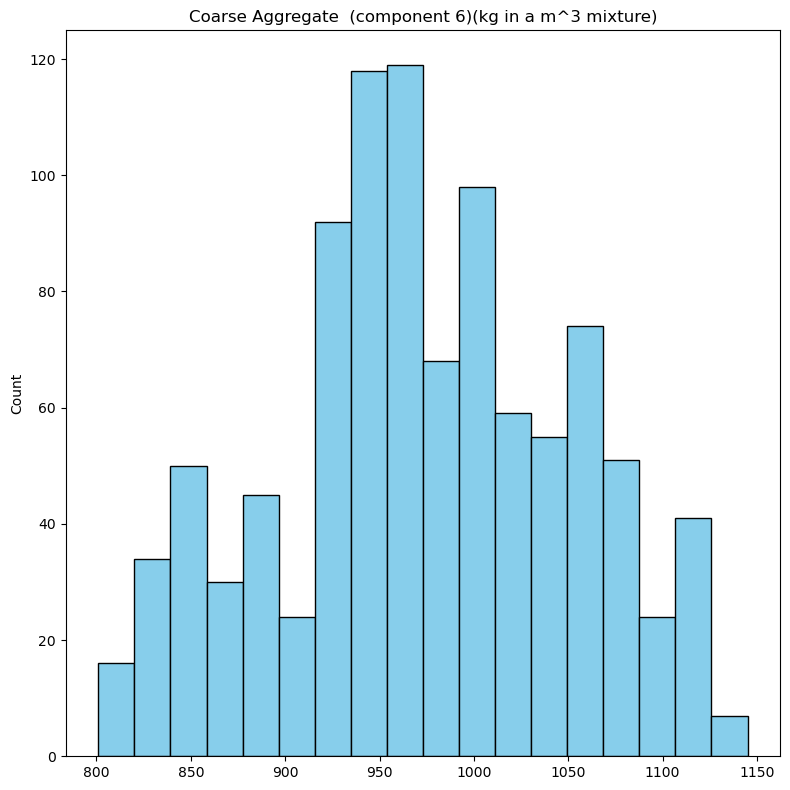

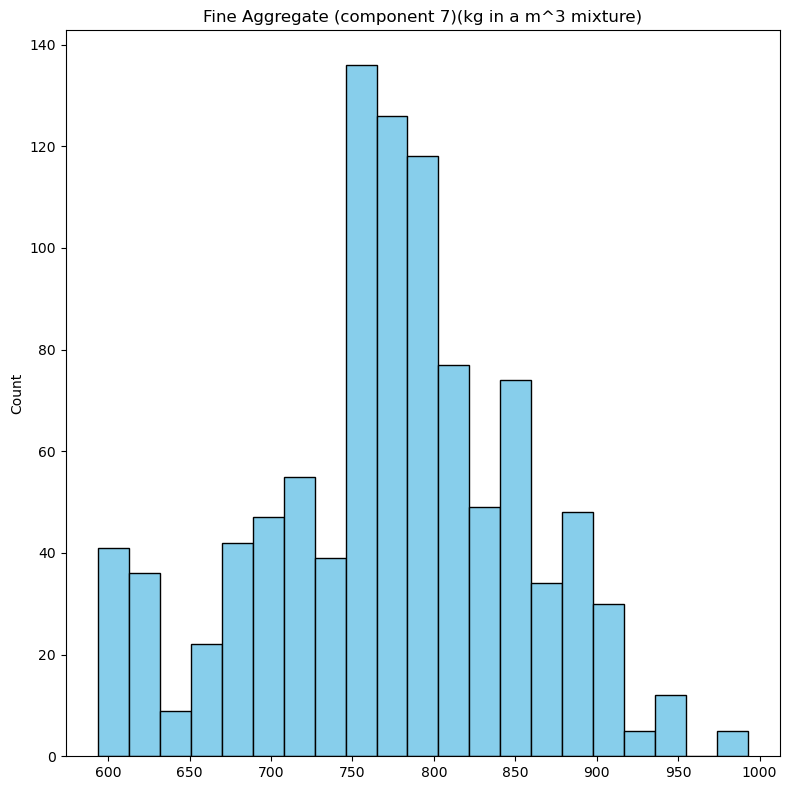

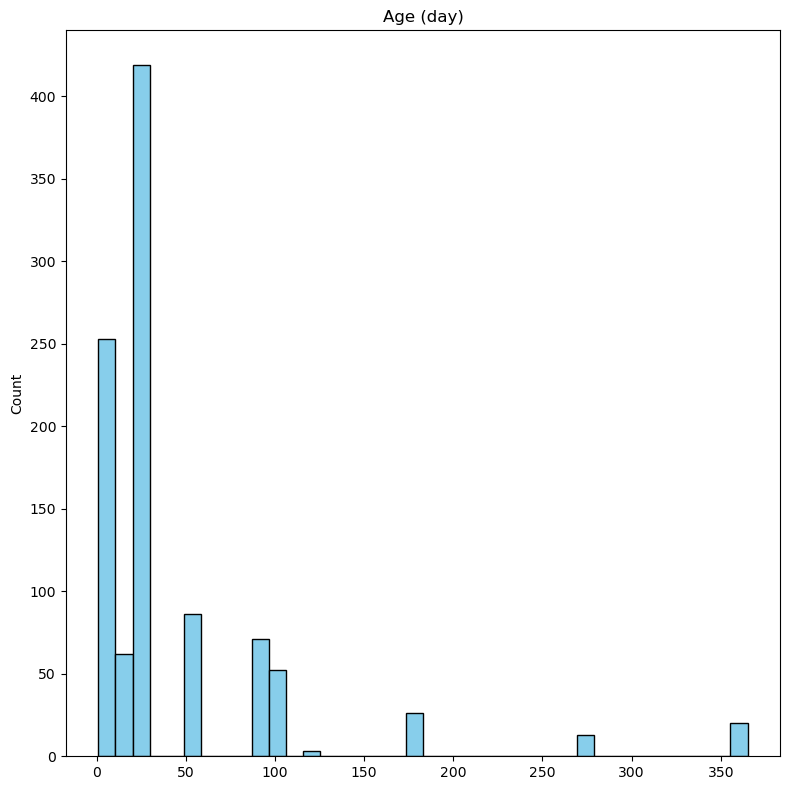

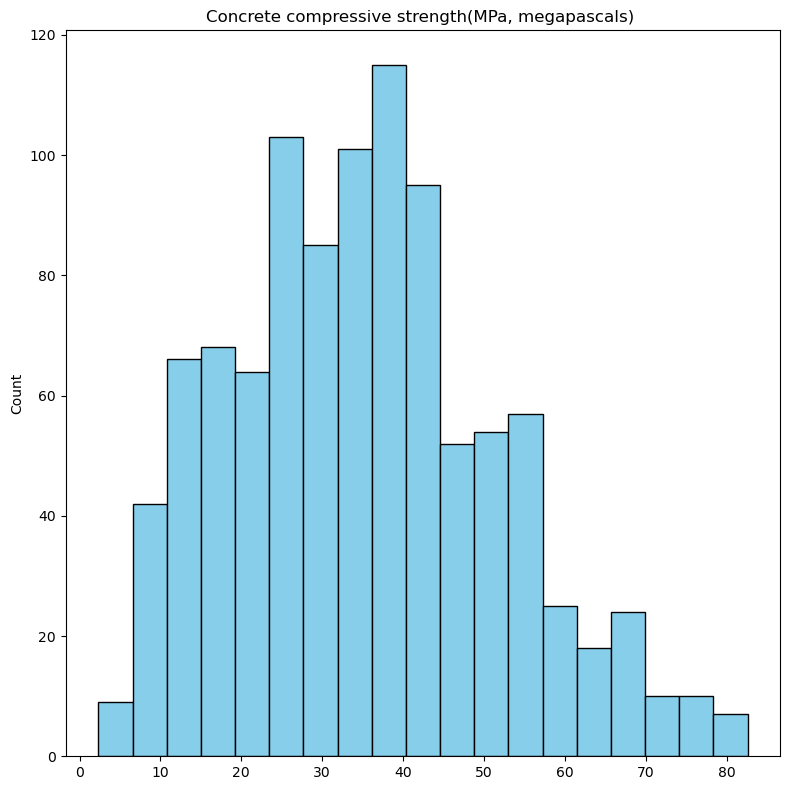

In [27]:
for column in data.columns:

    plt.figure(figsize=(8, 8))

    # Histogram 
    plt.hist(data[column], bins='auto', color="skyblue", edgecolor="black")
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Count")


    plt.tight_layout()
    plt.show()

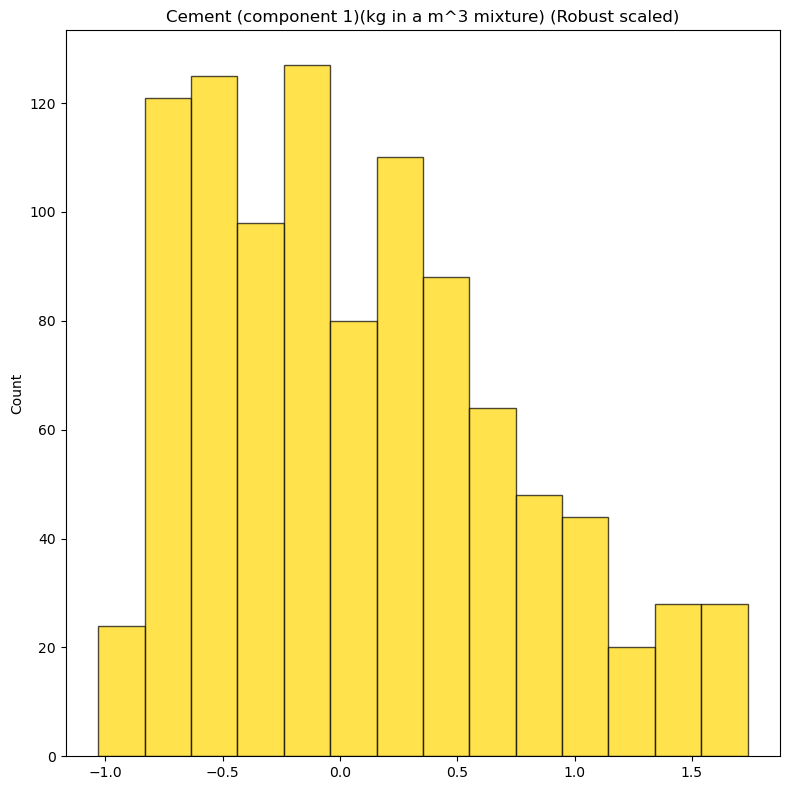

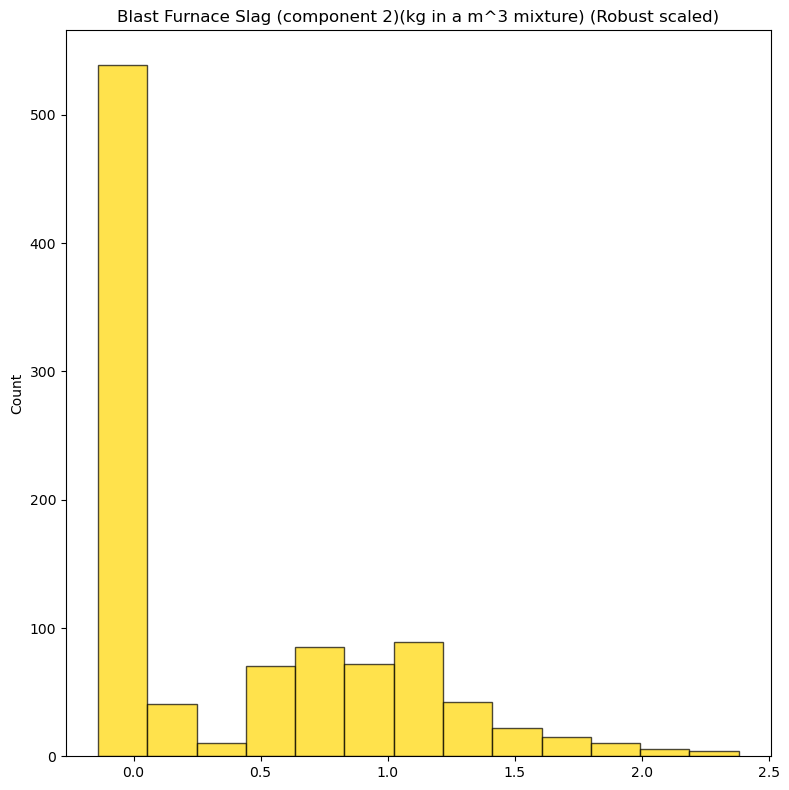

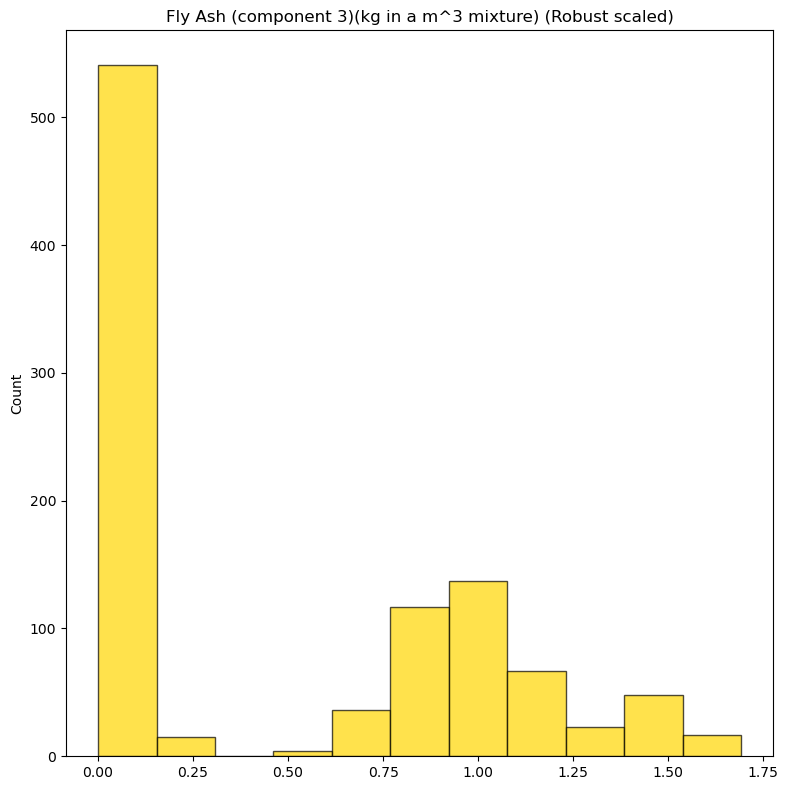

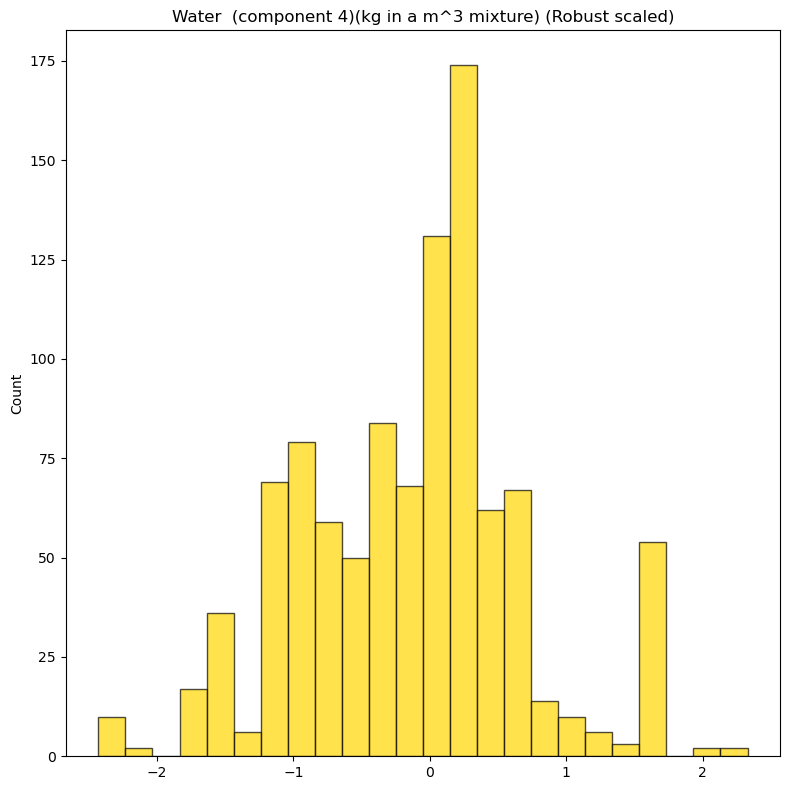

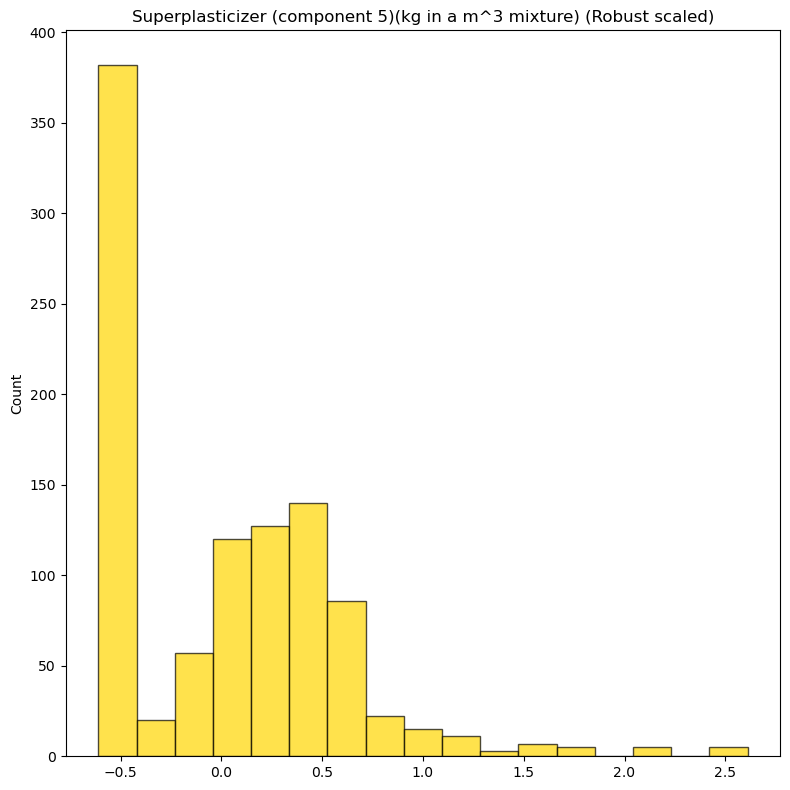

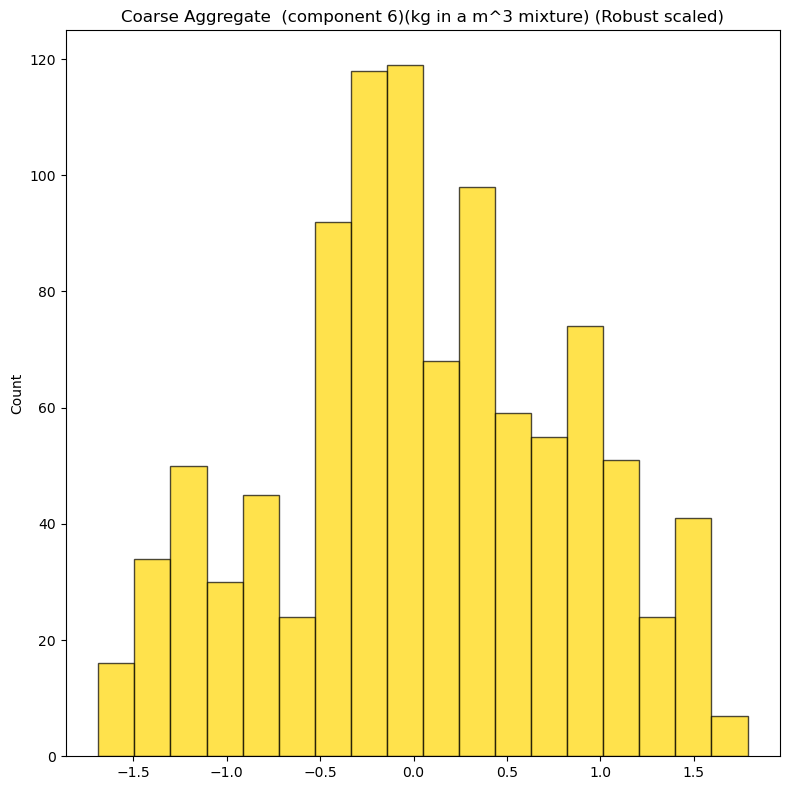

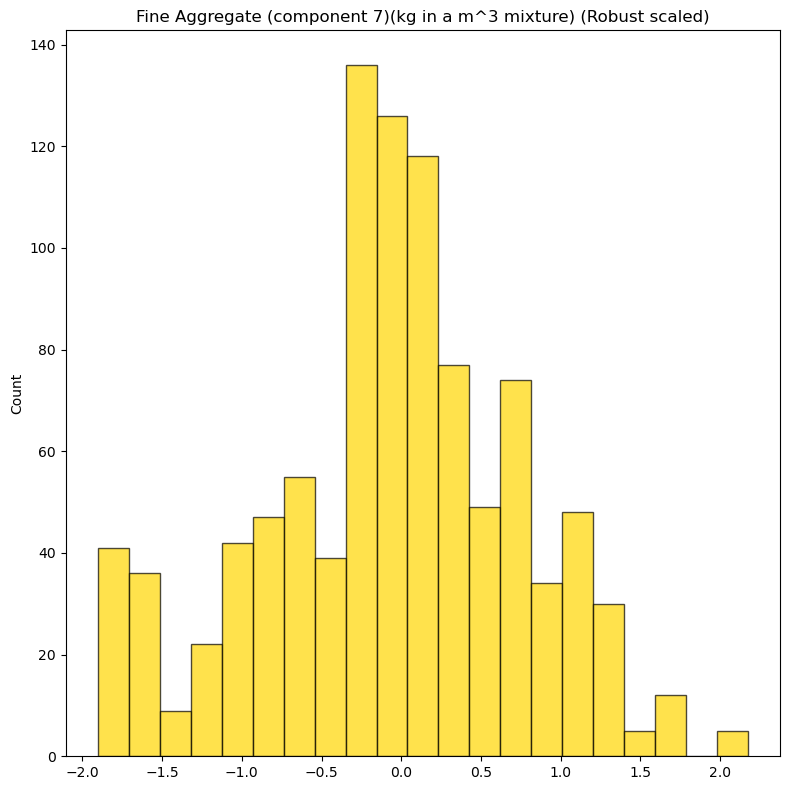

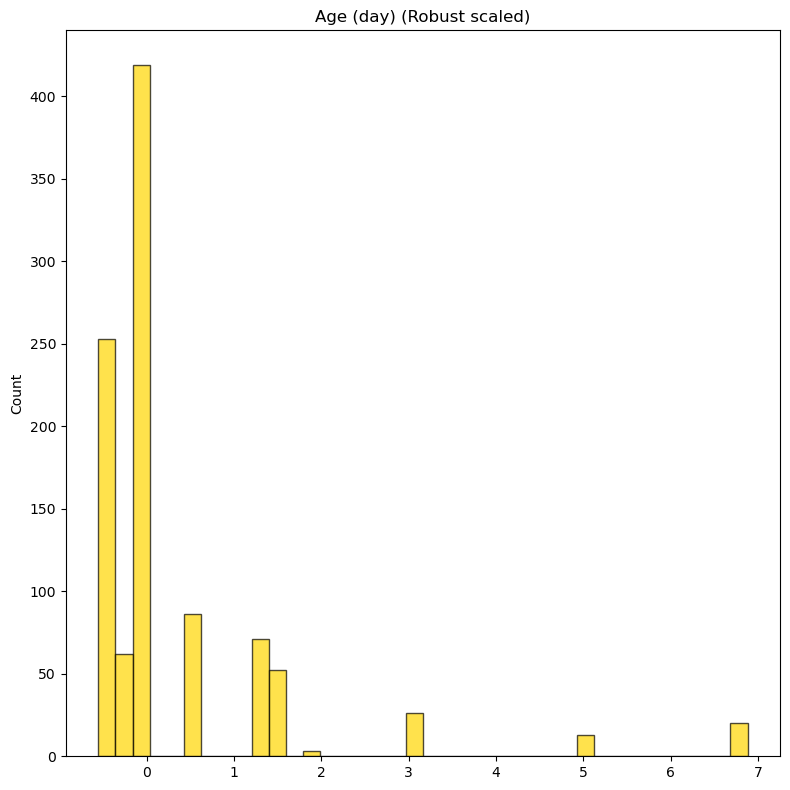

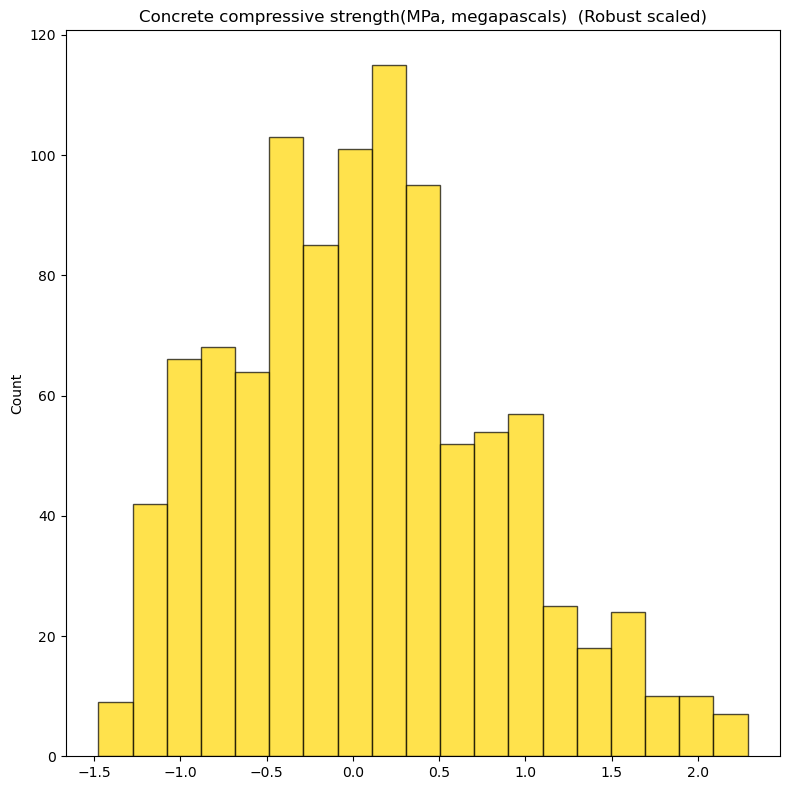

In [28]:
def plot_scaled_histograms(data, scaler_type='standard'):
    """
    Строит гистограммы для скалированных признаков
    
    Parameters:
    data: исходный DataFrame
    scaler_type: тип скейлера ('standard', 'minmax', 'robust')
    """
    
    # Выбираем скейлер
    if scaler_type == 'Standard':
        scaler = StandardScaler()
        color = "lightcoral"
    elif scaler_type == 'MinMax':
        scaler = MinMaxScaler()
        color = "lightgreen"
    elif scaler_type == 'Robust':
        scaler = RobustScaler()
        color = "gold"
    else:
        raise ValueError("scaler_type должен быть 'Standard', 'MinMax' или 'Robust'")
    
    # Применяем scaling
    scaled_data = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
    
    # Строим гистограммы
    for column in scaled_df.columns:
        plt.figure(figsize=(8, 8))
        plt.hist(scaled_df[column], bins='auto', color=color, edgecolor="black", alpha=0.7)
        plt.title(f"{column} ({scaler_type} scaled)")
        plt.xlabel("")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

# Использование
# plot_scaled_histograms(data, scaler_type='Standard')
# plot_scaled_histograms(data, scaler_type='MinMax')
plot_scaled_histograms(data, scaler_type='Robust')

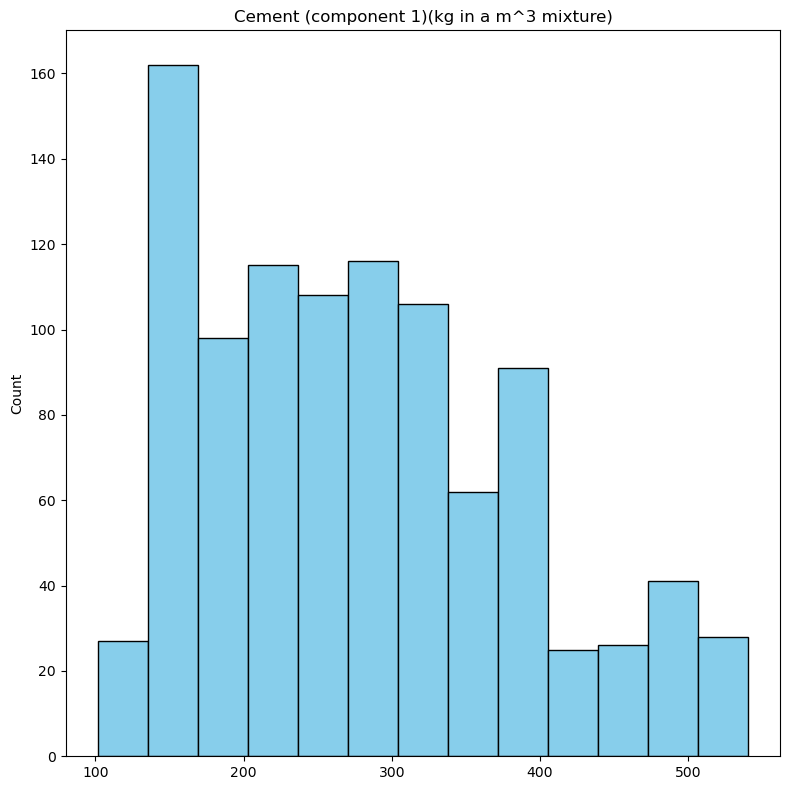

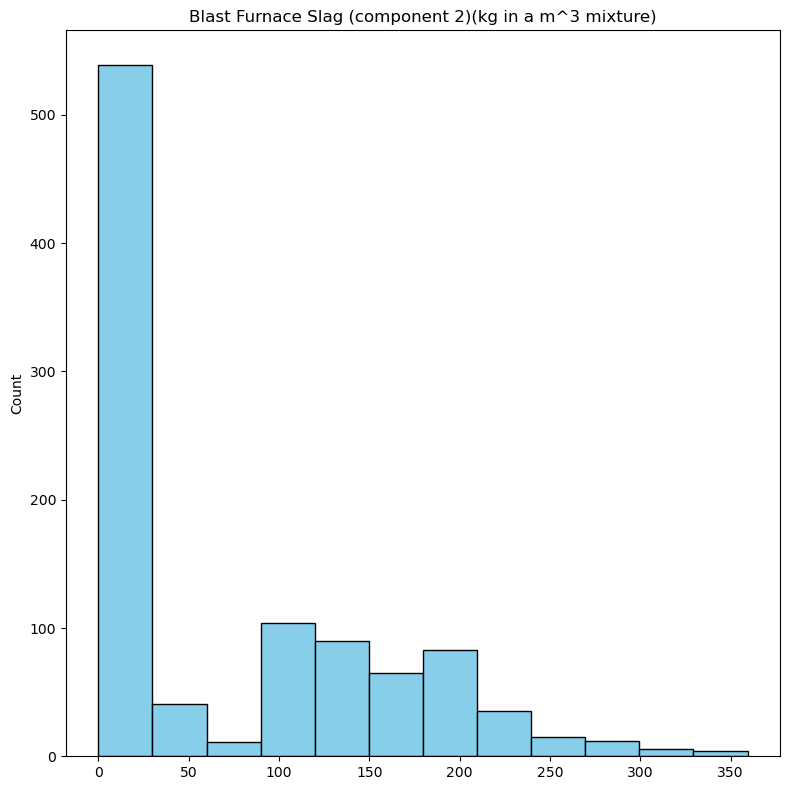

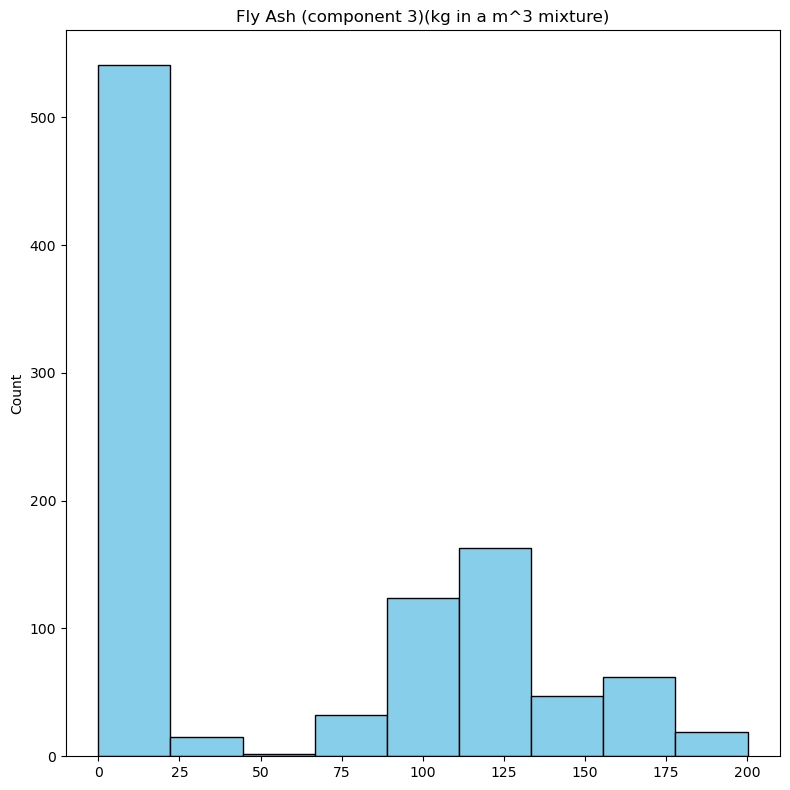

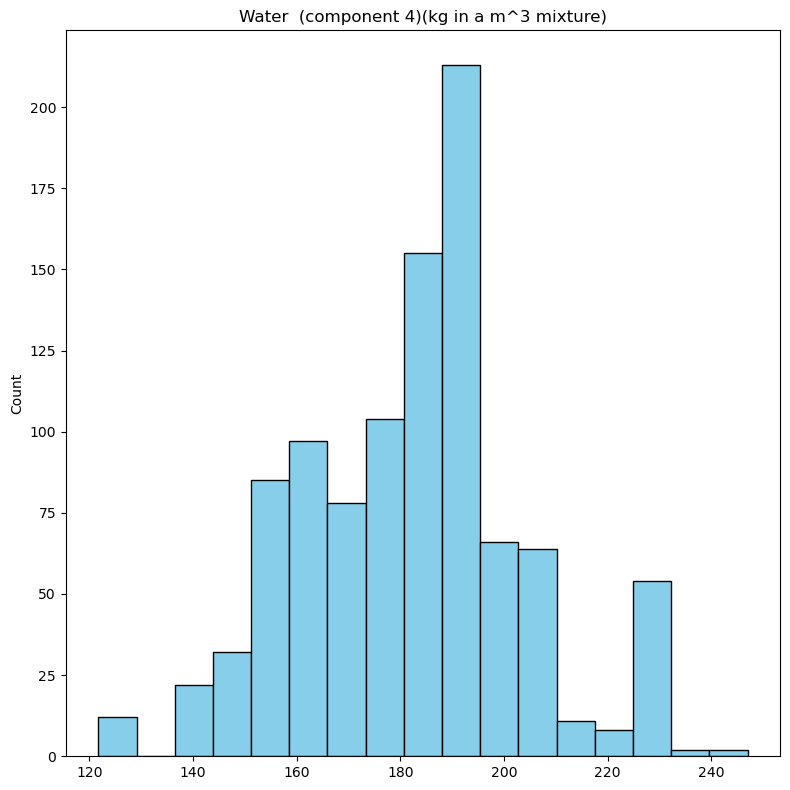

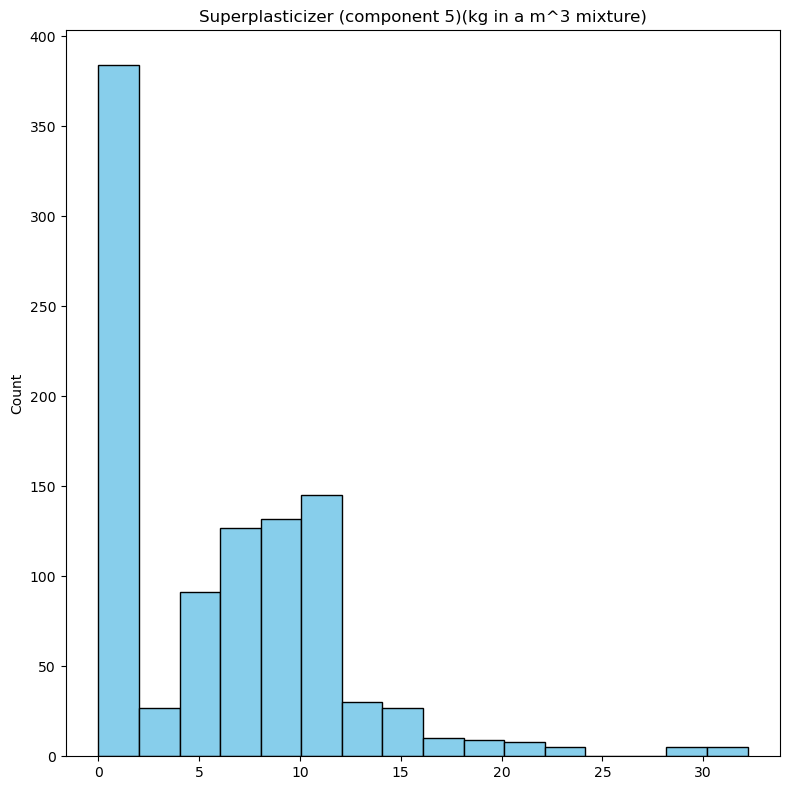

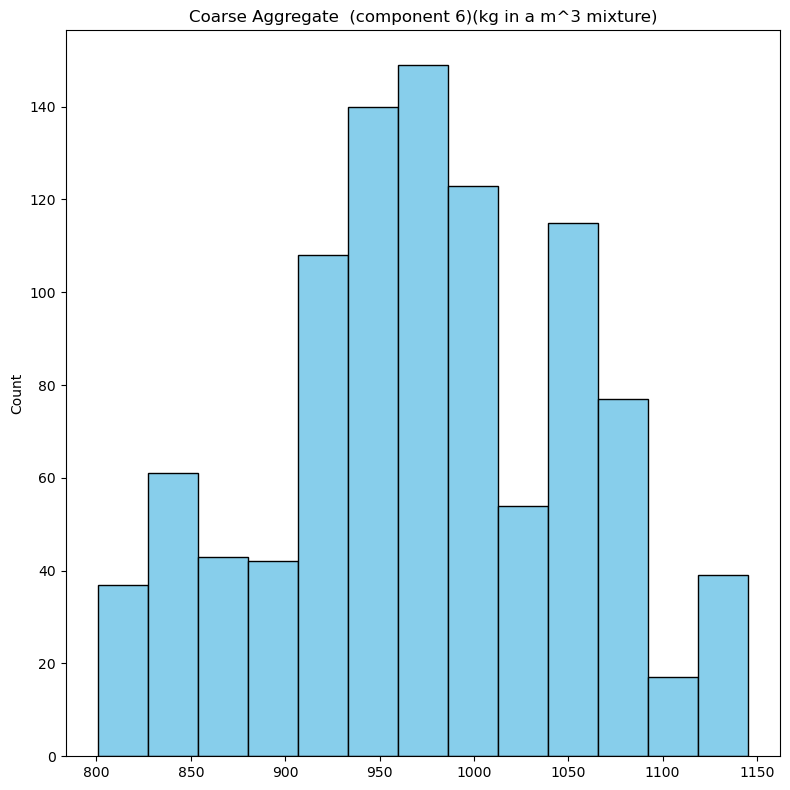

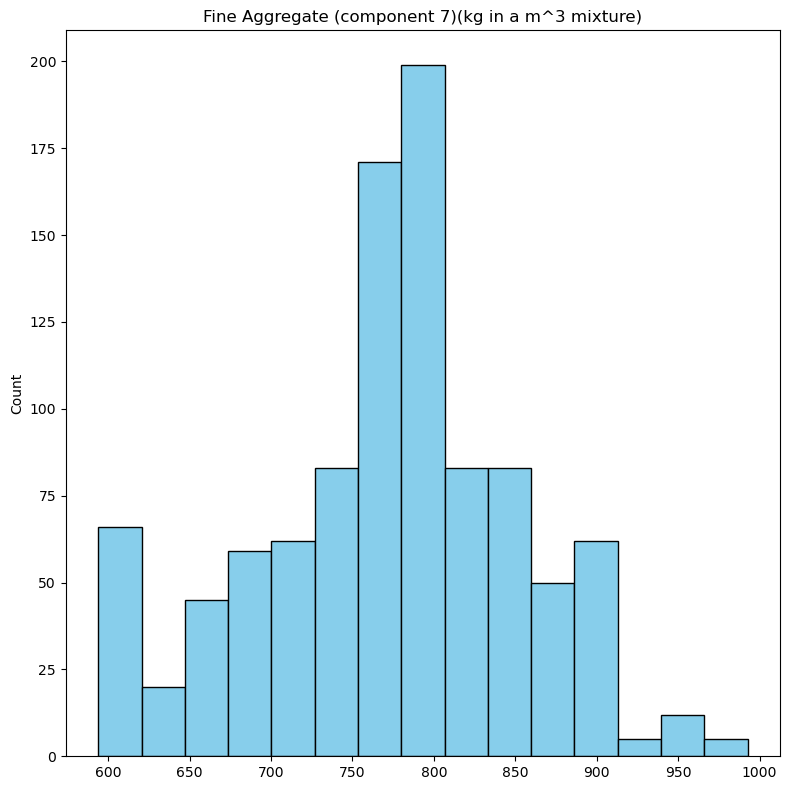

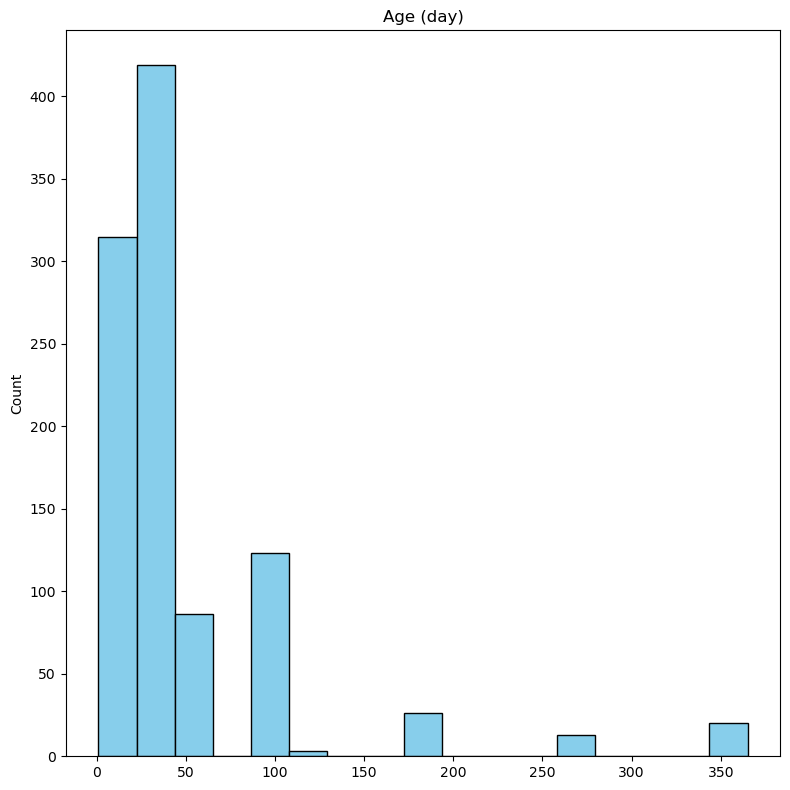

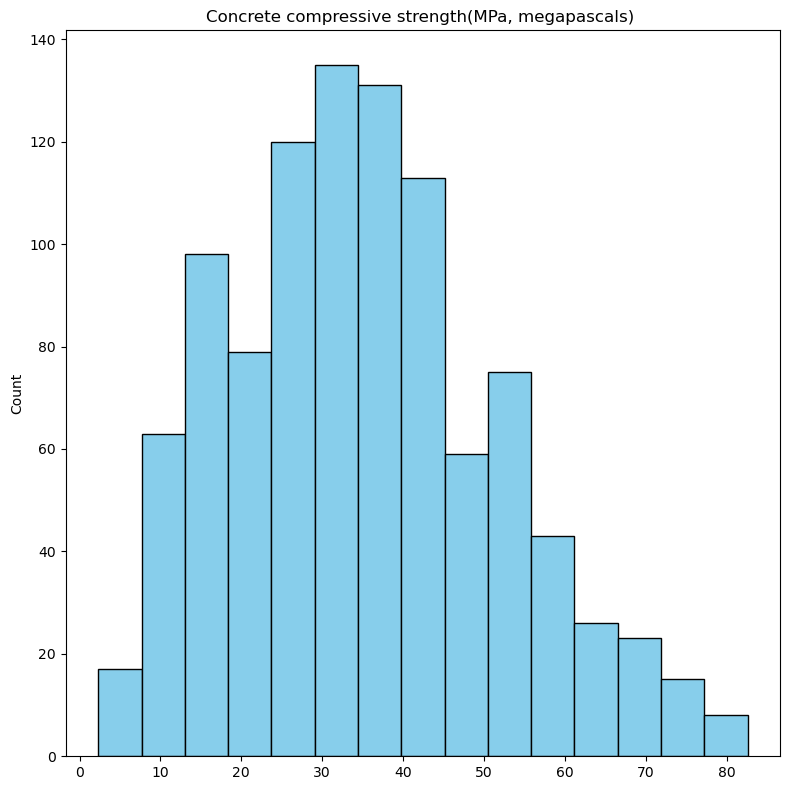

In [29]:
for column in data.columns:

    plt.figure(figsize=(8, 8))

    # Histogram 
    plt.hist(data[column], bins=scott_rule(data[column]), color="skyblue", edgecolor="black")
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Count")


    plt.tight_layout()
    plt.show()

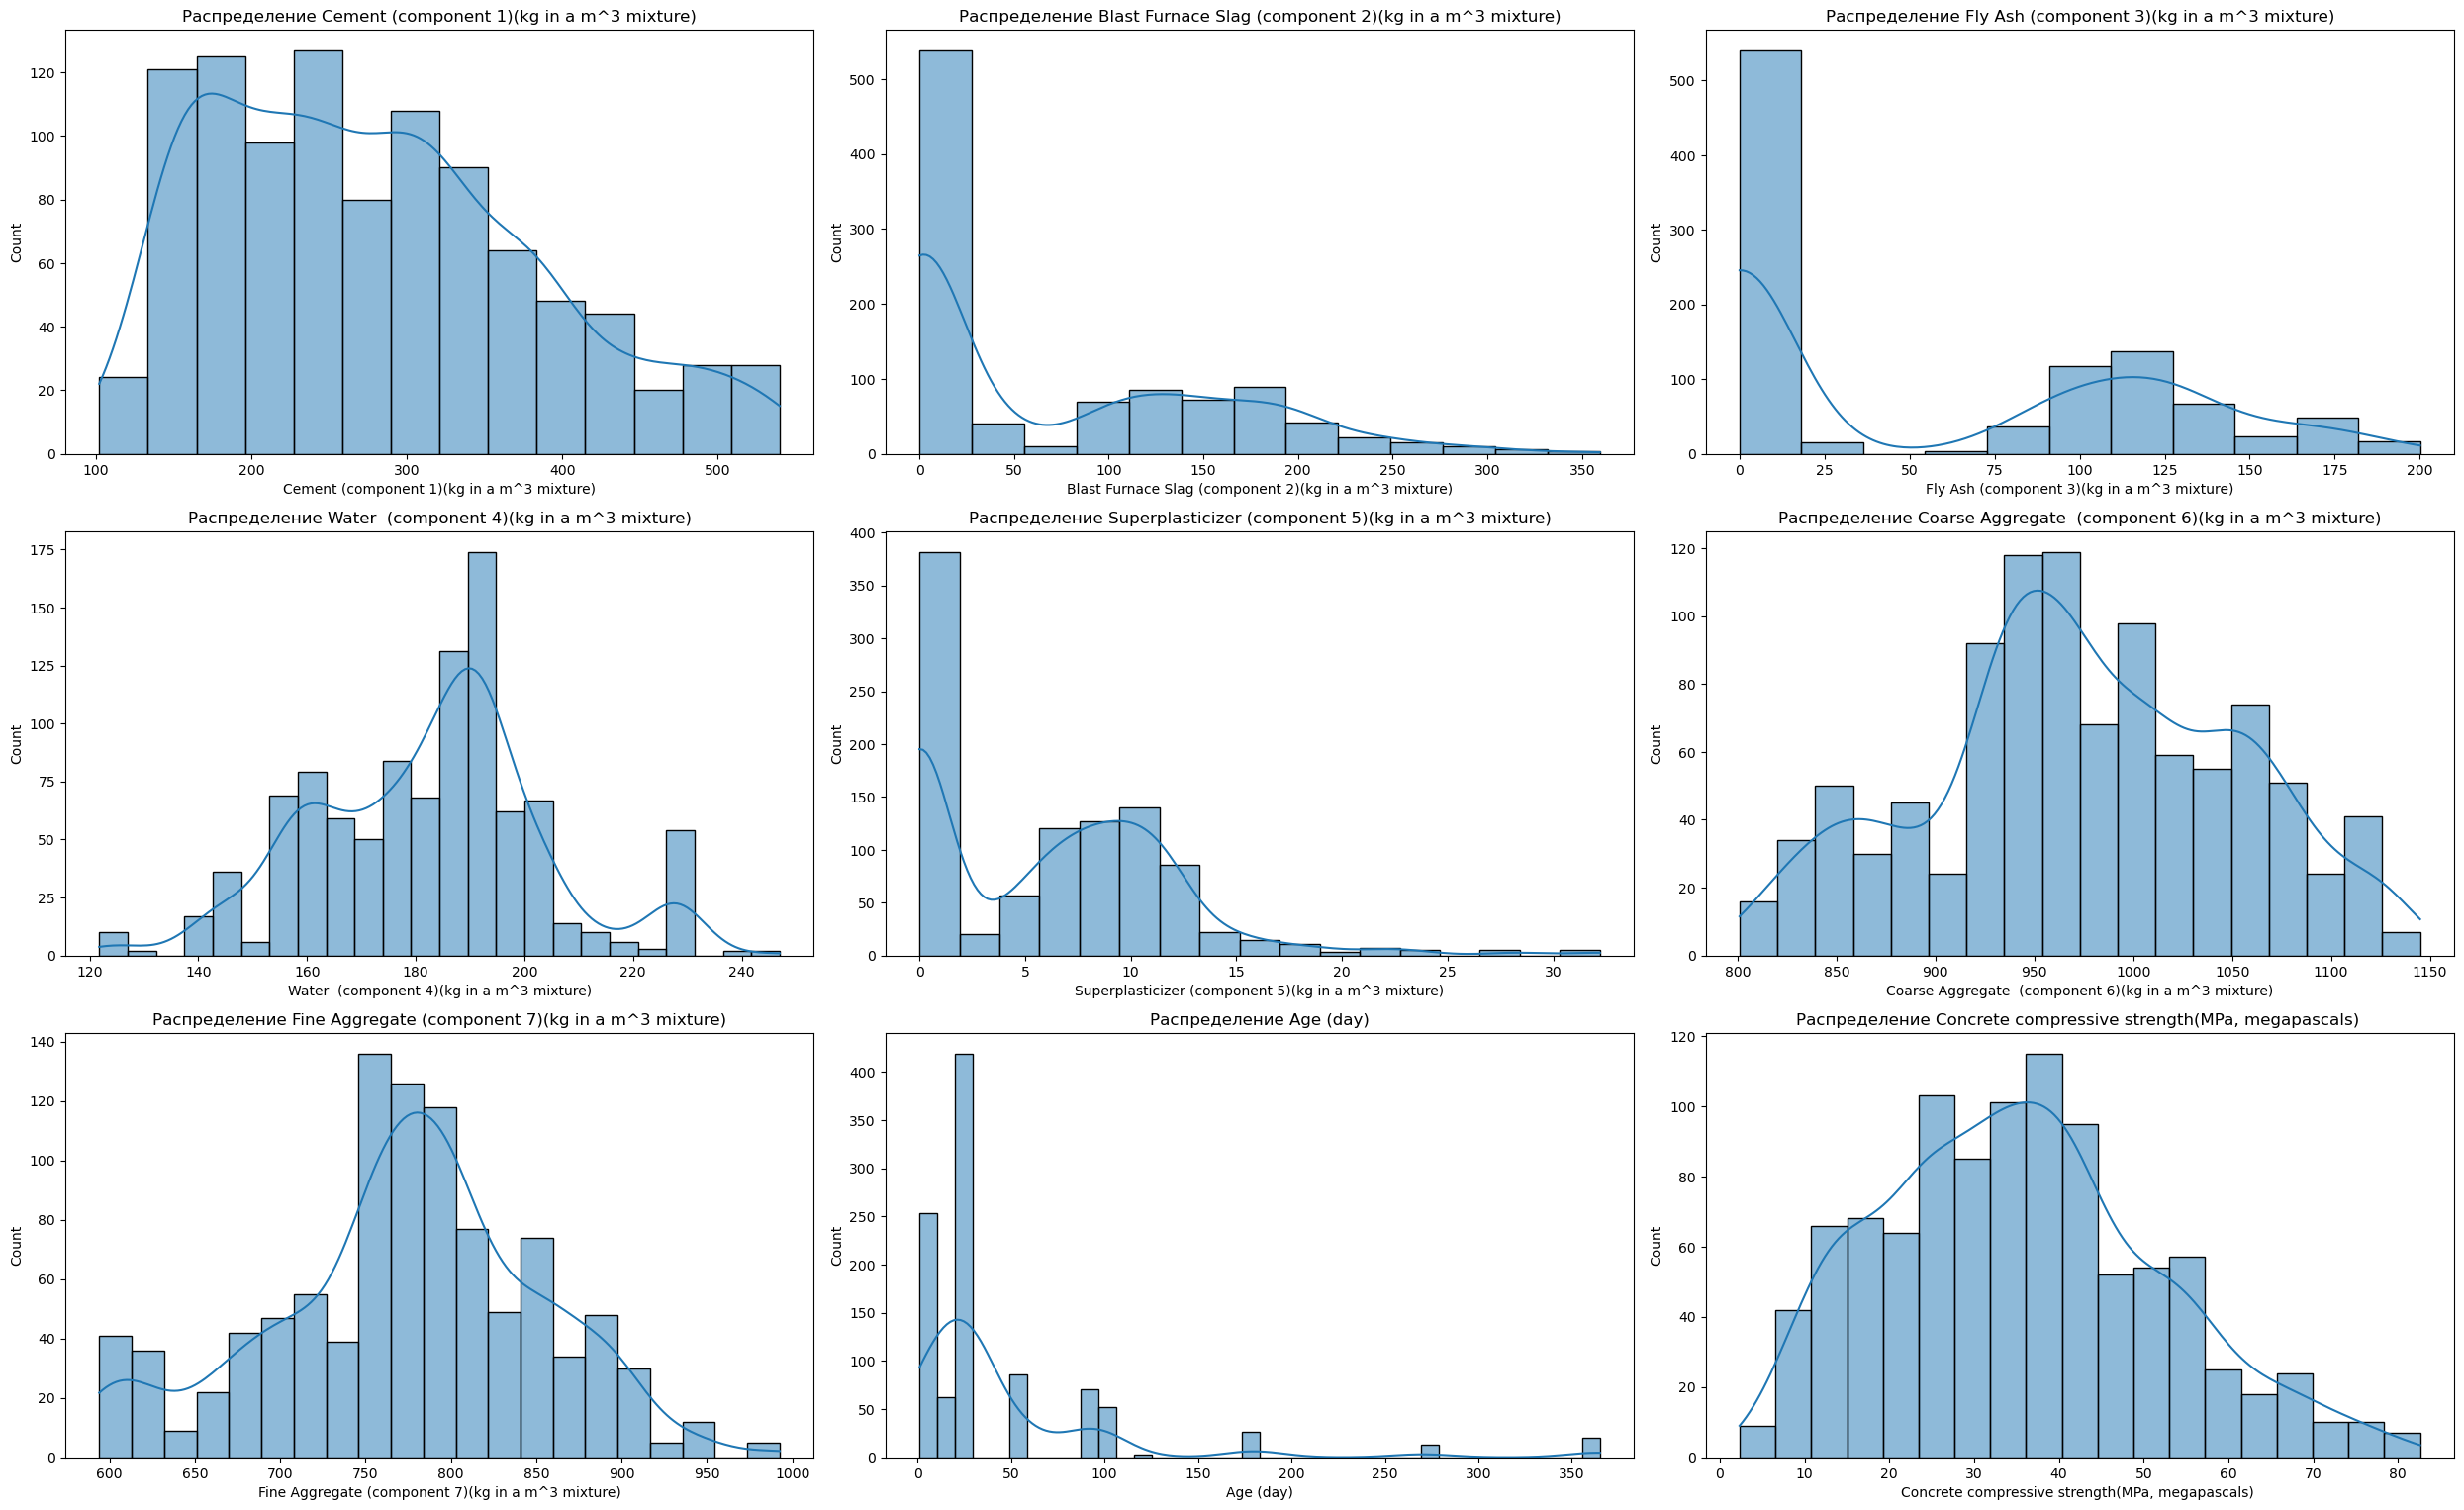

In [30]:
# Посмотрим на распределение числовых признаков
plt.figure(figsize=(25, 20))
for i, feature in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

In [31]:
data.describe()



Cement (component 1)(kg in a m^3 mixture)  \
count                                1005.000000   
mean                                  278.629055   
std                                   104.345003   
min                                   102.000000   
25%                                   190.680000   
50%                                   265.000000   
75%                                   349.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1005.000000       
mean                                           72.043134       
std                                            86.170555       
min                                             0.000000       
25%                                             0.000000       
50%                                            20.000000       
75%                                           142.500000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1005.000000   
mean                                    55.535075   
std                                     64.207448   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1005.000000   
mean                                  182.074378   
std                                    21.340740   
min                                   121.750000   
25%                                   166.610000   
50%                                   185.700000   
75%                                   192.940000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1005.000000     
mean                                            6.031647     
std                                             5.919559     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.100000     
75%                                            10.000000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1005.000000      
mean                                          974.376468      
std                                            77.579534      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1031.000000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1005.000000  1005.000000   
mean                                          772.686617    45.856716   
std                                            80.339851    63.734692   
min                                           594.000000     1.000000   
25%                                           724.300000     7.000000   
50%                                           780.000000    28.000000   
75%                                           822.200000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1005.000000  
mean                                          35.250273  
std                                           16.284808

In [32]:
data.columns.to_list()

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

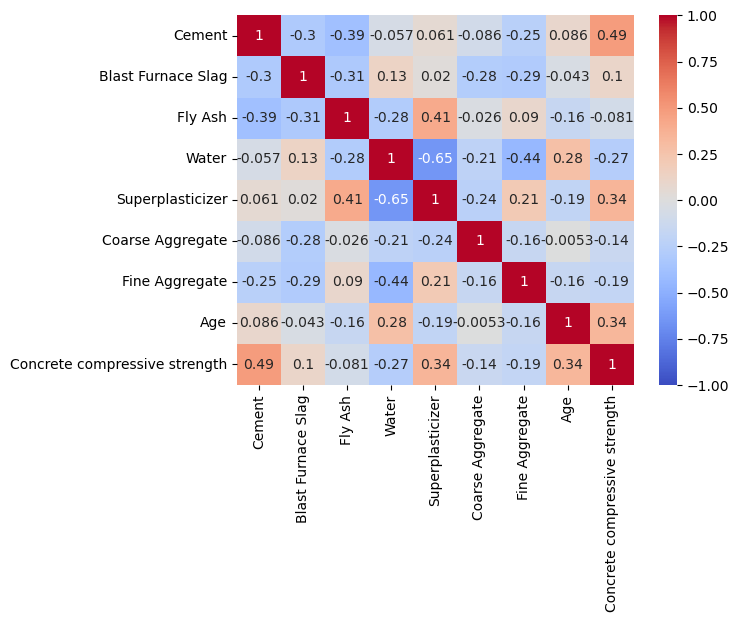

In [33]:
corr = data.corr()
new_labels = [
'Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age',
 'Concrete compressive strength' ]  # ваши новые названия

sns.heatmap(corr,cmap="coolwarm",annot=True,vmax=1,vmin=-1, xticklabels=new_labels, yticklabels=new_labels)
plt.show()


# Разделение данных

In [35]:
def r2_test(model, X_train, y_train, X_test, y_test):
    """
    Вычисляет R² на тестовых данных
    
    Parameters:
    model - модель для обучения
    X_train, y_train - тренировочные данные
    X_test, y_test - тестовые данные
    
    Returns:
    R² на тестовых данных
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"R² на тестовых данных: {r2:.4f}")
    return r2

In [36]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [37]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '], axis=1)
y = data['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [38]:
X.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [39]:
# Добавьте преобразование перед RobustScaler
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.pipeline import make_pipeline

# Вариант 1: Логарифмическое преобразование
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Линейные модели с предобработкой
LR = make_pipeline(
    PowerTransformer(method="yeo-johnson"), 
    RobustScaler(), 
    LinearRegression()
)

Lasso = make_pipeline(
    PowerTransformer(method="yeo-johnson"),
    RobustScaler(), 
    Lasso(alpha=0.0005, random_state=1)
)

Enet = make_pipeline(
    PowerTransformer(method="yeo-johnson"),
    RobustScaler(), 
    ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=1)
)

KRR = make_pipeline(
    PowerTransformer(method="yeo-johnson"),
    RobustScaler(),
    KernelRidge(
        alpha=0.10897211128206553,
        kernel='laplacian',
        gamma=0.21266284379113484,
        degree=4,
        coef0=3.985687414327643
    )
)

# # Добавленные модели
# Ridge = make_pipeline(
#     PowerTransformer(method="yeo-johnson"),
#     RobustScaler(),
#     Ridge(alpha=1.0)
# )

DecisionTree = DecisionTreeRegressor(
    random_state=1
)

# RandomForest -
RandomForest = RandomForestRegressor(
    n_estimators=534,
    max_depth=17,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='log2',
    bootstrap=False,
    random_state=1,
    n_jobs=-1
)

GradientBoosting = GradientBoostingRegressor(
    n_estimators=100,
    random_state=1
)

SVR = make_pipeline(
    PowerTransformer(method="yeo-johnson"),
    RobustScaler(),
    SVR(kernel='rbf', C=1.0)
)

# Ансамблевые модели
XGB = XGBRegressor(
    n_estimators=1915,
    max_depth=3, 
    learning_rate=0.049299917338415065, 
    subsample=0.7909152232517357, 
    colsample_bytree=0.5789946016808658, 
    gamma=0.16222283145211988, 
    reg_alpha=0.5704108288572931, 
    reg_lambda=0.7226188451645048, 
    min_child_weight=2.342022919371164,
    random_state=1
)


LGB = LGBMRegressor(
    n_estimators=763,
    max_depth=4,
    learning_rate=0.05725117685291825,
    num_leaves=48,
    boosting_type='gbdt',
    subsample=0.7685418995739443,
    subsample_freq=5,
    colsample_bytree=0.8987392713671873,
    reg_alpha=0.27348262402508633,
    reg_lambda=0.14181887180673508,
    min_split_gain=0.07394978648079066,
    min_child_weight=4.652074660047633,
    min_child_samples=13,
    random_state=42,
    n_jobs=-1,
    verbose=-1,
    objective='regression'
)

from sklearn.preprocessing import PolynomialFeatures

# Модель с полиномиальными взаимодействиями + Ridge регуляризация
PolyRidge = make_pipeline(
    PowerTransformer(method="yeo-johnson"),
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    RobustScaler(),
    Ridge(alpha=0.5, random_state=1)
)

# Альтернативный вариант с ElasticNet для отбора значимых взаимодействий
PolyENet = make_pipeline(
    PowerTransformer(method="yeo-johnson"),
    PolynomialFeatures(degree=3, interaction_only=False, include_bias=False),
    RobustScaler(),
    ElasticNet(
        alpha=0.04167434221036161,
        l1_ratio=0.9537048648178694, 
        max_iter=4367,
        tol=0.00019748481583364402,
        selection='random',
        random_state=1
    )
)

# Вариант с KernelRidge на полиномиальных фичах
PolyKRR = make_pipeline(
    PowerTransformer(method="yeo-johnson"),
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    RobustScaler(),
    KernelRidge(
        alpha=0.1,
        kernel='rbf',
        gamma=0.1,
        degree=3
    )
)

In [41]:
def r2_test(model, X_train, y_train, X_test, y_test):
    """
    Вычисляет R² на тестовых данных
    
    Parameters:
    model - модель для обучения
    X_train, y_train - тренировочные данные
    X_test, y_test - тестовые данные
    
    Returns:
    R² на тестовых данных
    """
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2", n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"R² на тестовых данных: {r2:.4f}")
    return r2

In [42]:
r2_test(LR, X_train, y_train, X_test, y_test)

R² на тестовых данных: 0.7797


0.779667721765279

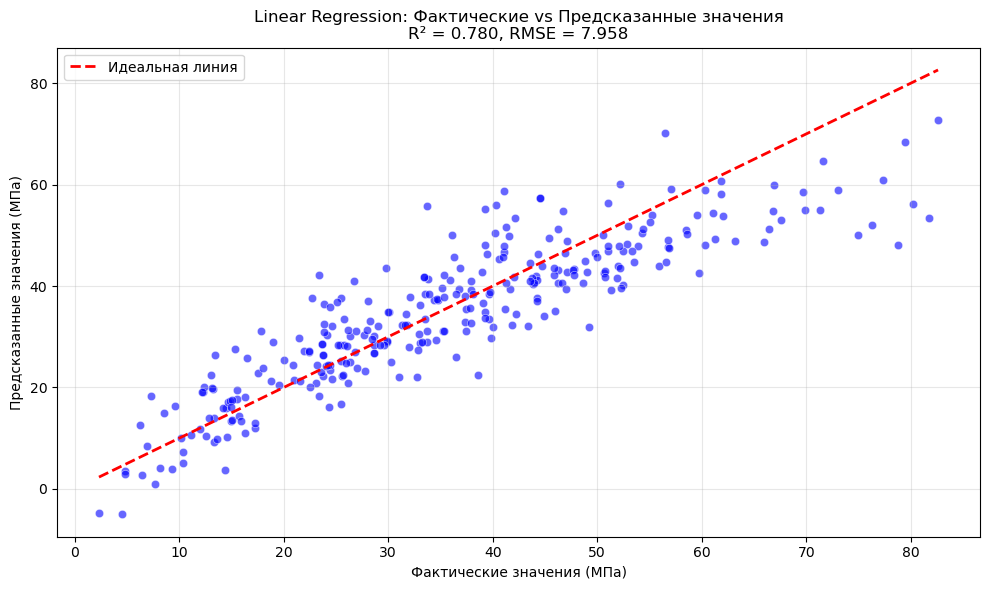

In [43]:

# Создание и обучение модели
LR.fit(X_train, y_train)

# Предсказания
y_pred = LR.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Linear Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
r2_test(Lasso, X_train, y_train, X_test, y_test)

R² на тестовых данных: 0.7797


0.7796742573817277

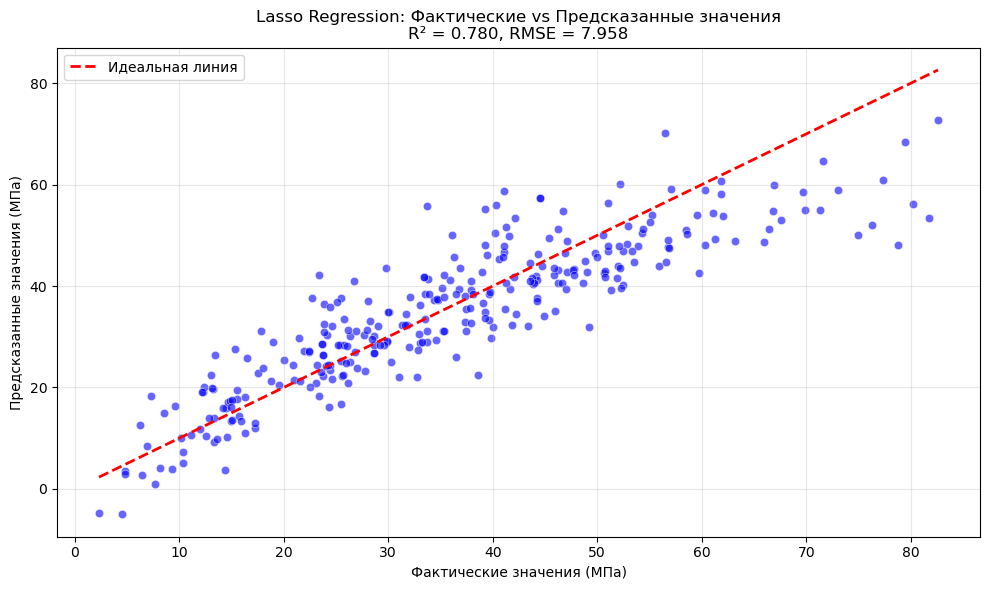

In [45]:

# Создание и обучение модели
Lasso.fit(X_train, y_train)

# Предсказания
y_pred = Lasso.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Lasso Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
r2_test(Enet, X_train, y_train, X_test, y_test)

R² на тестовых данных: 0.7797


0.7796816586341121

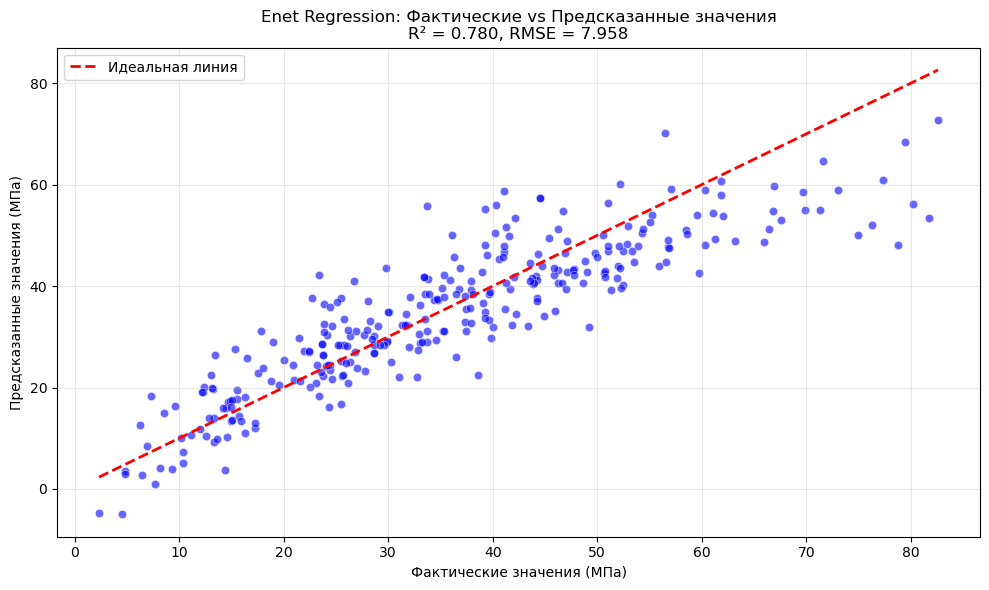

In [47]:

# Создание и обучение модели
Enet.fit(X_train, y_train)

# Предсказания
y_pred = Enet.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Enet Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
r2_test(KRR, X_train, y_train, X_test, y_test)

R² на тестовых данных: 0.9287


0.9287484418066165

In [49]:
def MAE_test(model, X_train, y_train, X_test, y_test):
    """
    Вычисляет R² на тестовых данных
    
    Parameters:
    model - модель для обучения
    X_train, y_train - тренировочные данные
    X_test, y_test - тестовые данные
    
    Returns:
    R² на тестовых данных
    """
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2", n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"MAE на тестовых данных: {mae:.4f}")
    return mae

In [61]:
MAE_test(KRR, X_train, y_train, X_test, y_test)

MAE на тестовых данных: 2.9017


2.901735056570246

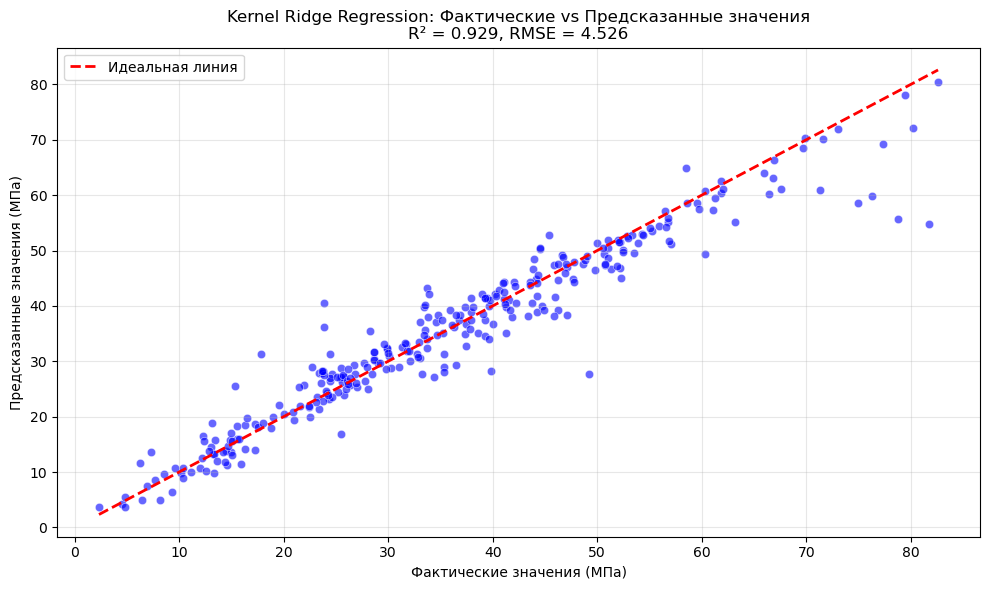

In [50]:

# Создание и обучение модели
KRR.fit(X_train, y_train)

# Предсказания
y_pred = KRR.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Kernel Ridge Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

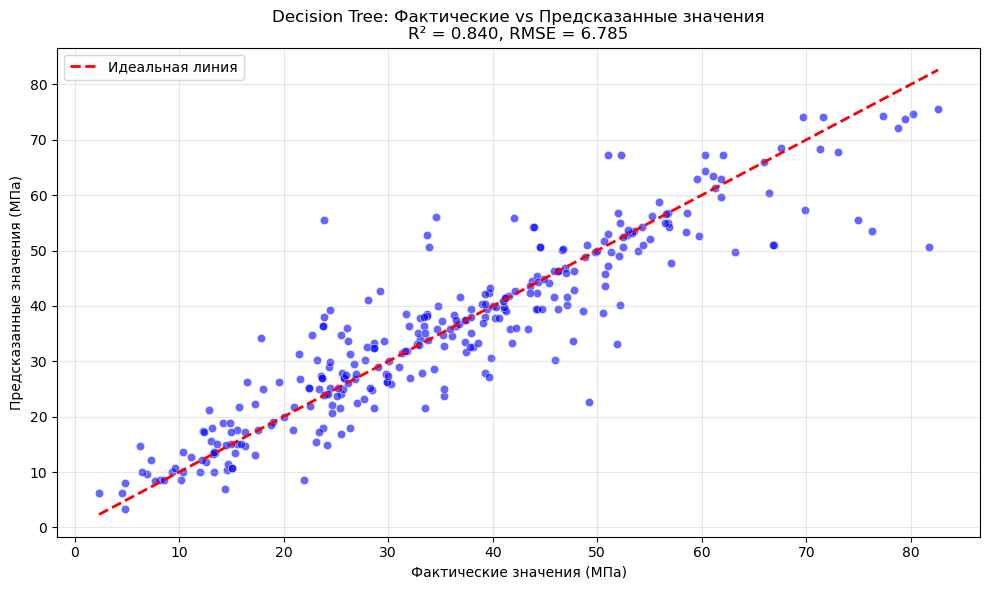

In [51]:

# Создание и обучение модели
DecisionTree.fit(X_train, y_train)

# Предсказания
y_pred = DecisionTree.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Decision Tree: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

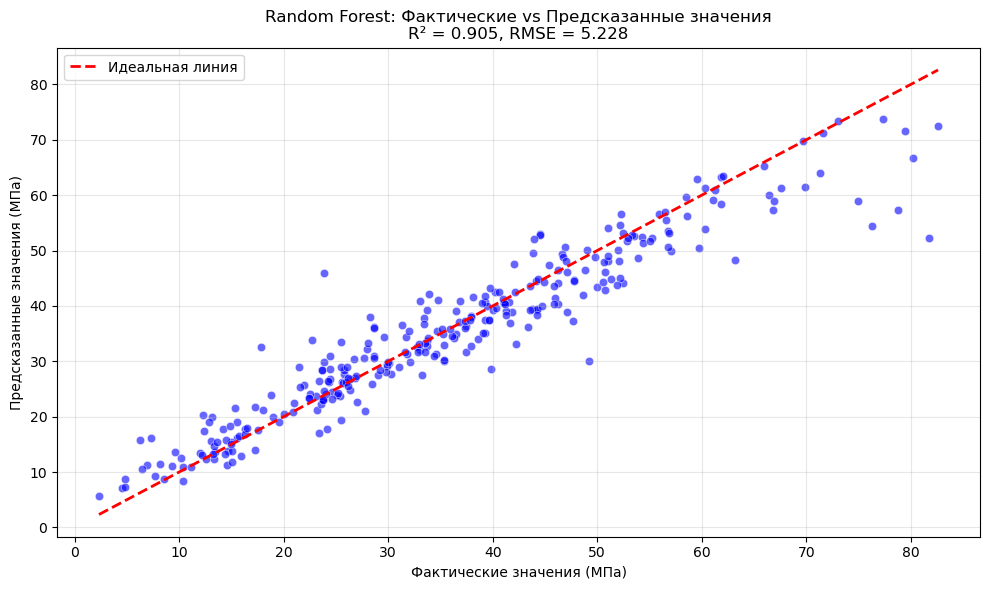

In [52]:

# Создание и обучение модели
RandomForest.fit(X_train, y_train)

# Предсказания
y_pred = RandomForest.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Random Forest: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

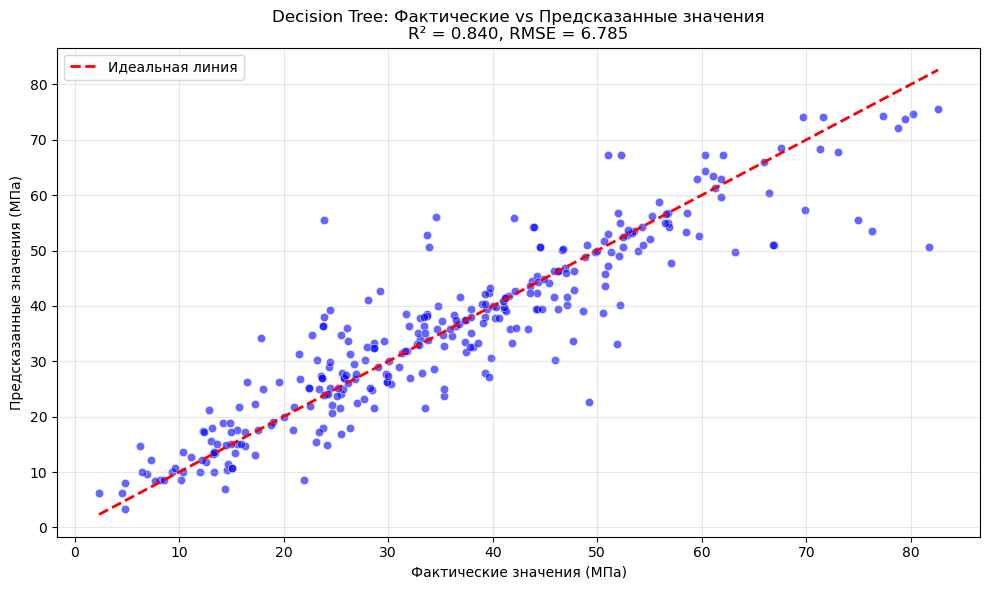

In [53]:

# Создание и обучение модели
DecisionTree.fit(X_train, y_train)

# Предсказания
y_pred = DecisionTree.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Decision Tree: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

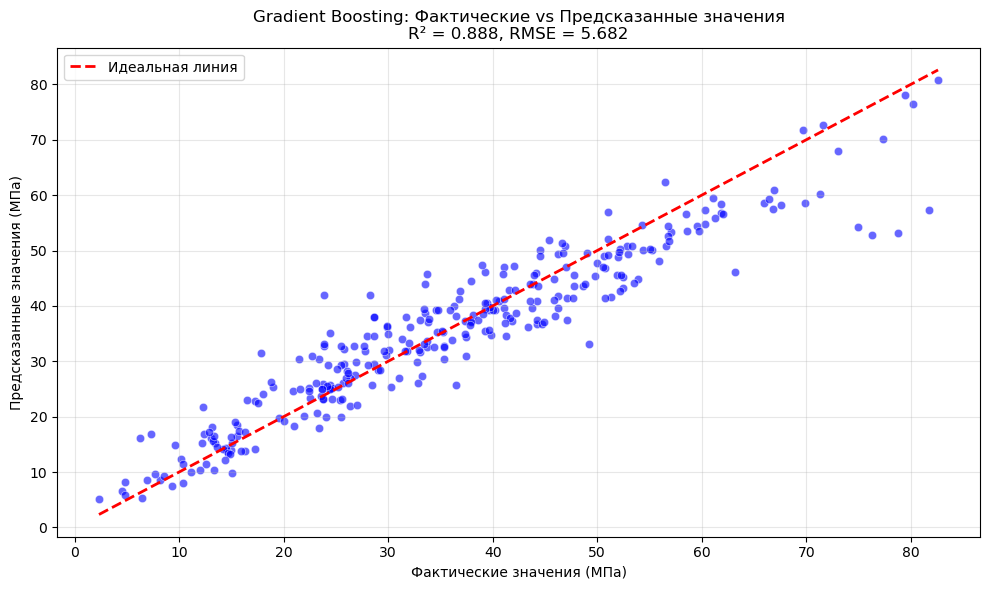

In [54]:

# Создание и обучение модели
GradientBoosting.fit(X_train, y_train)

# Предсказания
y_pred = GradientBoosting.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Gradient Boosting: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [55]:
r2_test(XGB, X_train, y_train, X_test, y_test)

R² на тестовых данных: 0.9312


0.931175818886038

In [56]:
XGB

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5789946016808658, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.16222283145211988, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.049299917338415065,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2.342022919371164, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1915,
             n_jobs=None, num_parallel_tree=None, ...)

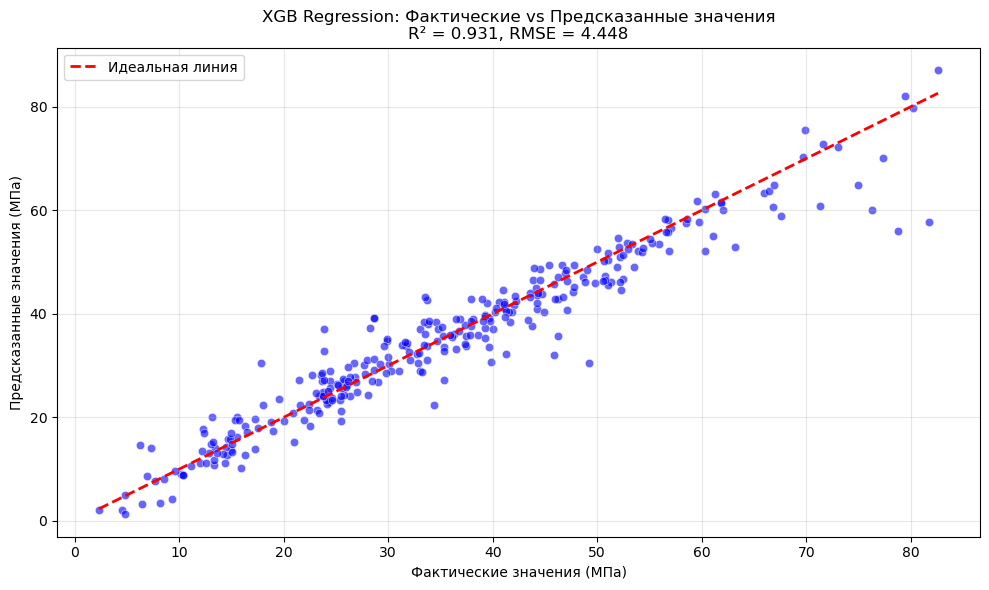

In [57]:

# Создание и обучение модели
XGB.fit(X_train, y_train)

# Предсказания
y_pred = XGB.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'XGB Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
# r2_test(LGB, X_train, y_train, X_test, y_test)

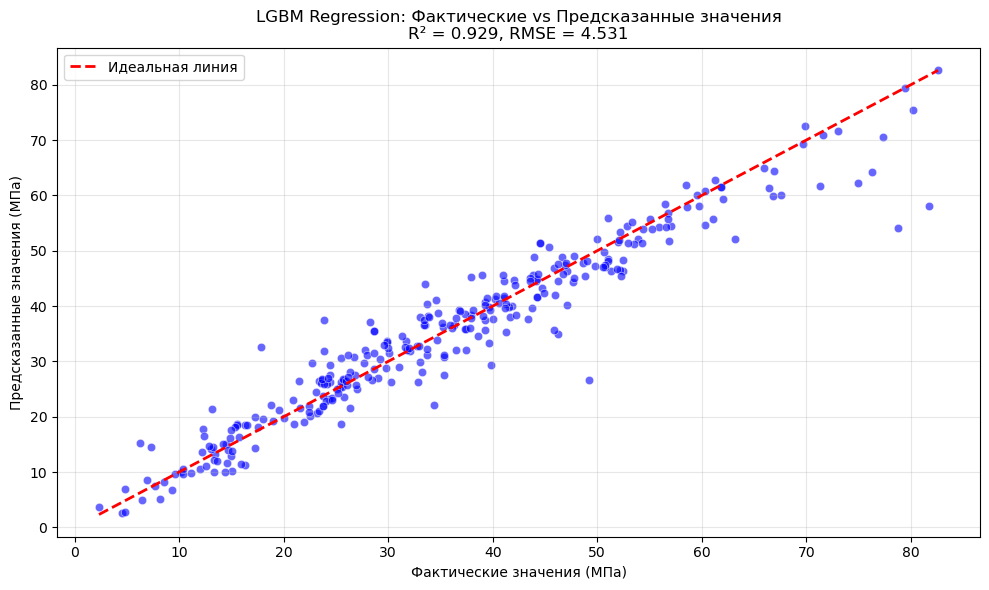

In [59]:

# Создание и обучение модели
LGB.fit(X_train, y_train)

# Предсказания
y_pred = LGB.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'LGBM Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time

def compare_models(models_dict, X_train, y_train, X_test, y_test, cv=10):
    """
    Сравнивает производительность моделей
    
    Parameters:
    models_dict: словарь {имя: модель}
    X_train, y_train: тренировочные данные
    X_test, y_test: тестовые данные
    cv: количество фолдов для кросс-валидации
    """
    results = []
    
    for name, model in models_dict.items():
        print(f"Тестируем {name}...")
        start_time = time.time()
        
        # Кросс-валидация
        cv_scores = cross_val_score(model, X_train, y_train, 
                                  cv=cv, scoring='r2')
        cv_r2_mean = cv_scores.mean()
        cv_r2_std = cv_scores.std()
        
        # Обучение на полном тренировочном наборе
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Метрики на тестовых данных
        test_r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        # Время обучения
        training_time = time.time() - start_time
        
        results.append({
            'Model': name,
            'CV_R2_Mean': cv_r2_mean,
            'CV_R2_Std': cv_r2_std,
            'Test_R2': test_r2,
            'RMSE': rmse,
            'MAE': mae,
            'mape': mape,
            'Time_sec': training_time
        })
        
        print(f"R² (CV): {cv_r2_mean:.4f} ± {cv_r2_std:.4f}")
        print(f"R² (Test): {test_r2:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MAPE: {mape:.4f}")
        print(f"Время: {training_time:.2f} сек\n")
    
    # Создаем DataFrame с результатами
    results_df = pd.DataFrame(results)
    
    # Сортировка по Test_R2 (основная метрика)
    results_df = results_df.sort_values('Test_R2', ascending=False)
    
    return results_df

# Создаем словарь моделей
models = {
    'LinearRegression': LR,
    'Lasso': Lasso,
    'ElasticNet': Enet,
    # 'Ridge': Ridge,
    'KernelRidge': KRR,
    'DecisionTreeRegressor':DecisionTree,
    'RandomForest':RandomForest,
    'GradientBoosting': GradientBoosting,
    'XGBoost': XGB,
    'LightGBM': LGB,
    'PolyRidge': PolyRidge,
    'PolyElasticnet': PolyENet,
    'PolyKRR':PolyKRR
}

# Сравниваем модели
results_df = compare_models(models, X_train, y_train, X_test, y_test)

Тестируем LinearRegression...
R² (CV): 0.7981 ± 0.0281
R² (Test): 0.7797
RMSE: 7.9583
MAE: 6.1312
MAPE: 21.4661
Время: 0.17 сек

Тестируем Lasso...
R² (CV): 0.7981 ± 0.0281
R² (Test): 0.7797
RMSE: 7.9581
MAE: 6.1311
MAPE: 21.4637
Время: 0.18 сек

Тестируем ElasticNet...
R² (CV): 0.7981 ± 0.0281
R² (Test): 0.7797
RMSE: 7.9580
MAE: 6.1310
MAPE: 21.4626
Время: 0.16 сек

Тестируем KernelRidge...
R² (CV): 0.9302 ± 0.0160
R² (Test): 0.9287
RMSE: 4.5256
MAE: 2.9017
MAPE: 9.8371
Время: 0.25 сек

Тестируем DecisionTreeRegressor...
R² (CV): 0.7869 ± 0.0663
R² (Test): 0.8398
RMSE: 6.7850
MAE: 4.4657
MAPE: 15.7088
Время: 0.05 сек

Тестируем RandomForest...
R² (CV): 0.8914 ± 0.0239
R² (Test): 0.9049
RMSE: 5.2282
MAE: 3.5142
MAPE: 12.7652
Время: 4.22 сек

Тестируем GradientBoosting...
R² (CV): 0.8935 ± 0.0232
R² (Test): 0.8877
RMSE: 5.6821
MAE: 4.1586
MAPE: 14.3302
Время: 1.03 сек

Тестируем XGBoost...
R² (CV): 0.9217 ± 0.0193
R² (Test): 0.9312
RMSE: 4.4478
MAE: 2.9484
MAPE: 10.5368
Время: 3.54 сек


In [63]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(9)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1], )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.summary()

ModuleNotFoundError: No module named 'keras'

In [ ]:


# Имитируем предсказания моделей (в реальности вы бы обучили модели)
y_pred_xgb = XGB.predict(X_test)
y_pred_krr = KRR.predict(X_test)
y_pred_lgb = LGB.predict(X_test)

# Создаем DataFrame для XGBoost
df_xgb = pd.DataFrame({
    'true_strength_MPa': y_test.values,
    'predicted_strength_MPa': y_pred_xgb,
    'model': 'XGBoost'
})
print("XGBoost DataFrame:")
print(df_xgb.head())
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.3f} МПа")
print()

# Создаем DataFrame для Kernel Ridge Regression
df_krr = pd.DataFrame({
    'true_strength_MPa': y_test.values,
    'predicted_strength_MPa': y_pred_krr,
    'model': 'KRR'
})
print("KRR DataFrame:")
print(df_krr.head())
print(f"MAE: {mean_absolute_error(y_test, y_pred_krr):.3f} МПа")
print()

# Создаем DataFrame для LightGBM
df_lgb = pd.DataFrame({
    'true_strength_MPa': y_test.values,
    'predicted_strength_MPa': y_pred_lgb,
    'model': 'LightGBM'
})
print("LightGBM DataFrame:")
print(df_lgb.head())
print(f"MAE: {mean_absolute_error(y_test, y_pred_lgb):.3f} МПа")

XGBoost DataFrame:
   true_strength_MPa  predicted_strength_MPa    model
0          19.009543               17.285543  XGBoost
1          24.290929               22.890249  XGBoost
2          26.322815               24.051626  XGBoost
3          34.569637               38.464542  XGBoost
4          44.133359               45.022114  XGBoost
MAE: 2.948 МПа

KRR DataFrame:
   true_strength_MPa  predicted_strength_MPa model
0          19.009543               19.958602   KRR
1          24.290929               23.239532   KRR
2          26.322815               25.642956   KRR
3          34.569637               37.008336   KRR
4          44.133359               44.783012   KRR
MAE: 2.902 МПа

LightGBM DataFrame:
   true_strength_MPa  predicted_strength_MPa     model
0          19.009543               19.143886  LightGBM
1          24.290929               23.163563  LightGBM
2          26.322815               21.526097  LightGBM
3          34.569637               41.083023  LightGBM
4        

In [ ]:
df_xgb

true_strength_MPa  predicted_strength_MPa    model
0            19.009543               17.285543  XGBoost
1            24.290929               22.890249  XGBoost
2            26.322815               24.051626  XGBoost
3            34.569637               38.464542  XGBoost
4            44.133359               45.022114  XGBoost
..                 ...                     ...      ...
297           6.467285                3.172794  XGBoost
298          44.868340               40.399654  XGBoost
299          52.303649               44.645412  XGBoost
300          36.447770               38.984413  XGBoost
301          56.495663               58.302959  XGBoost

[302 rows x 3 columns]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    """Вычисляет основные метрики для модели"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Средняя абсолютная процентная ошибка (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse, 
        'RMSE': rmse,
        'R²': r2,
        'MAPE%': mape
    }

# Оценка всех моделей
models = {
    'XGBoost': (y_test, y_pred_xgb),
    'KRR': (y_test, y_pred_krr),
    'LightGBM': (y_test, y_pred_lgb)
}

results = []
for model_name, (y_true, y_pred) in models.items():
    results.append(evaluate_model(y_true, y_pred, model_name))

df_metrics = pd.DataFrame(results)
print("Сравнение метрик моделей:")
print(df_metrics.round(4))

Сравнение метрик моделей:
      Model     MAE      MSE    RMSE      R²    MAPE%
0   XGBoost  2.9484  19.7833  4.4478  0.9312  10.5368
1       KRR  2.9017  20.4810  4.5256  0.9287   9.8371
2  LightGBM  3.0567  20.5256  4.5305  0.9286  10.8993


In [ ]:
def advanced_concrete_metrics(y_true, y_pred, model_name):
    """Специфичные метрики для прочности бетона"""
    
    errors = y_pred - y_true
    abs_errors = np.abs(errors)
    
    metrics = {
        'Model': model_name,
        'MAE (MPa)': mean_absolute_error(y_true, y_pred),
        'RMSE (MPa)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred),
        'MAPE (%)': np.mean(abs_errors / y_true) * 100,
    }
    
    # Процент предсказаний в пределах допустимой погрешности
    tolerance_5 = np.mean(abs_errors <= 5) * 100  # ±5 MPa
    tolerance_10 = np.mean(abs_errors <= 10) * 100  # ±10 MPa
    
    metrics['Within ±5 MPa (%)'] = tolerance_5
    metrics['Within ±10 MPa (%)'] = tolerance_10
    
    # Смещение (bias)
    metrics['Bias (MPa)'] = np.mean(errors)
    
    # Стандартное отклонение ошибок
    metrics['Std of Errors (MPa)'] = np.std(errors)
    
    # Коэффициент вариации RMSE
    metrics['CV-RMSE (%)'] = (metrics['RMSE (MPa)'] / np.mean(y_true)) * 100
    
    return metrics

# Расширенная оценка
advanced_results = []
for model_name, (y_true, y_pred) in models.items():
    advanced_results.append(advanced_concrete_metrics(y_true, y_pred, model_name))

df_advanced = pd.DataFrame(advanced_results)
print("\nРасширенные метрики для прочности бетона:")
print(df_advanced.round(3))


Расширенные метрики для прочности бетона:
      Model  MAE (MPa)  RMSE (MPa)     R²  MAPE (%)  Within ±5 MPa (%)  \
0   XGBoost      2.948       4.448  0.931    10.537             84.768   
1       KRR      2.902       4.526  0.929     9.837             83.775   
2  LightGBM      3.057       4.531  0.929    10.899             81.457   

   Within ±10 MPa (%)  Bias (MPa)  Std of Errors (MPa)  CV-RMSE (%)  
0              95.364      -0.532                4.416       12.448  
1              96.026      -0.472                4.501       12.665  
2              95.695      -0.451                4.508       12.679  


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import numpy as np

print("=== СТРАТЕГИЯ ОЦЕНКИ ДЛЯ МАЛОГО DATASET (~1000 строк) ===\n")

# 1. Кросс-валидация вместо одного разбиения
print("1. ИСПОЛЬЗУЕМ КРОСС-ВАЛИДАЦИЮ ДЛЯ НАДЕЖНОСТИ:")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def robust_cross_validation(models, X, y, cv_folds=10):
    """Надежная кросс-валидация для малых данных"""
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_results = {}
    
    scorers = {
        'mae': make_scorer(mean_absolute_error, greater_is_better=False),
        'r2': 'r2',
        'mse': make_scorer(mean_squared_error, greater_is_better=False)
    }
    
    for model_name, model in models.items():
        cv_scores = {}
        for score_name, scorer in scorers.items():
            scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
            if score_name in ['mae', 'mse']:
                scores = -scores  # инвертируем, т.к. меньше = лучше
            cv_scores[score_name] = {
                'mean': np.mean(scores),
                'std': np.std(scores),
                'all_scores': scores
            }
        cv_results[model_name] = cv_scores
    
    return cv_results

# 2. Статистическая значимость различий
print("2. ПРОВЕРЯЕМ СТАТИСТИЧЕСКУЮ ЗНАЧИМОСТЬ РАЗЛИЧИЙ:")

def statistical_significance_test(cv_results):
    """Проверка значимости различий между моделями"""
    from scipy import stats
    
    print("\nСтатистическая значимость различий (t-тест):")
    
    models = list(cv_results.keys())
    metrics = ['r2', 'mae']
    
    for metric in metrics:
        print(f"\n--- {metric.upper()} ---")
        for i in range(len(models)):
            for j in range(i+1, len(models)):
                model1_scores = cv_results[models[i]][metric]['all_scores']
                model2_scores = cv_results[models[j]][metric]['all_scores']
                
                t_stat, p_value = stats.ttest_rel(model1_scores, model2_scores)
                
                print(f"{models[i]} vs {models[j]}: p-value = {p_value:.4f}", 
                      "***" if p_value < 0.01 else "**" if p_value < 0.05 else "*" if p_value < 0.1 else "незначимо")

# 3. Анализ переобучения
print("3. АНАЛИЗ ПЕРЕОБУЧЕНИЯ ДЛЯ МАЛЫХ ДАННЫХ:")

def overfitting_analysis(models, X_train, X_test, y_train, y_test):
    """Анализ переобучения"""
    overfitting_results = {}
    
    for model_name, model in models.items():
        # Обучаем на тренировочных данных
        model.fit(X_train, y_train)
        
        # Предсказания на train и test
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Вычисляем метрики
        train_mae = mean_absolute_error(y_train, train_pred)
        test_mae = mean_absolute_error(y_test, test_pred)
        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)
        
        # Разница между train и test (признак переобучения)
        mae_gap = train_mae - test_mae
        r2_gap = train_r2 - test_r2
        
        overfitting_results[model_name] = {
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'mae_gap': mae_gap,
            'r2_gap': r2_gap,
            'overfitting_risk': 'высокий' if abs(r2_gap) > 0.1 else 'средний' if abs(r2_gap) > 0.05 else 'низкий'
        }
    
    return overfitting_results

# 4. Рекомендации для дипломной работы
print("4. РЕКОМЕНДАЦИИ ДЛЯ ДИПЛОМНОЙ РАБОТЫ:\n")

recommendations = """
ДЛЯ ДИПЛОМНОГО ПРОЕКТА С МАЛЫМ DATASET:

📊 СТРАТЕГИЯ ОЦЕНКИ:
1. Используйте 5-10 fold кросс-валидацию
2. Проверьте статистическую значимость различий
3. Проанализируйте переобучение
4. Используйте доверительные интервалы

🔍 КРИТЕРИИ ВЫБОРА МОДЕЛИ:
• Стабильность (низкое std в кросс-валидации)
• Низкий риск переобучения  
• Интерпретируемость (важно для диплома!)
• Простота объяснения алгоритма

📈 ЧТО ПИСАТЬ В ДИПЛОМЕ:
1. "Все модели показали сопоставимые результаты"
2. "Выбор модели основан на стабильности, а не только на точности"
3. "Учтены особенности малого dataset"
4. "Проведена проверка на переобучение"

🎯 ПРАКТИЧЕСКИЕ СОВЕТЫ:
• Выберите 1-2 модели для детального анализа
• Сделайте акцент на методологии оценки
• Визуализируйте результаты кросс-валидации
• Объясните, почему различия незначительны
"""

print(recommendations)

# 5. Визуализация для дипломной работы
def create_diploma_visualizations(cv_results, overfitting_results):
    """Визуализации для включения в диплом"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 5.1 Боксплот кросс-валидации R²
    r2_data = []
    for model_name, scores in cv_results.items():
        for r2_score in scores['r2']['all_scores']:
            r2_data.append({'Model': model_name, 'R²': r2_score})
    
    df_r2 = pd.DataFrame(r2_data)
    sns.boxplot(data=df_r2, x='Model', y='R²', ax=axes[0,0])
    axes[0,0].set_title('Распределение R² в кросс-валидации\n(чем меньше разброс - тем стабильнее модель)')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 5.2 Сравнение train/test ошибок
    models = list(overfitting_results.keys())
    train_mae = [overfitting_results[m]['train_mae'] for m in models]
    test_mae = [overfitting_results[m]['test_mae'] for m in models]
    
    x = np.arange(len(models))
    width = 0.35
    axes[0,1].bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.7)
    axes[0,1].bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.7)
    axes[0,1].set_xlabel('Model')
    axes[0,1].set_ylabel('MAE')
    axes[0,1].set_title('Сравнение ошибок на Train/Test\n(большая разница = переобучение)')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(models, rotation=45)
    axes[0,1].legend()
    
    # 5.3 Стабильность моделей (std в кросс-валидации)
    stability_data = []
    for model_name, scores in cv_results.items():
        stability_data.append({
            'Model': model_name,
            'R²_std': scores['r2']['std'],
            'MAE_std': scores['mae']['std']
        })
    
    df_stability = pd.DataFrame(stability_data)
    x_stab = np.arange(len(df_stability))
    axes[1,0].bar(x_stab - width/2, df_stability['R²_std'], width, label='Std R²', alpha=0.7)
    axes[1,0].bar(x_stab + width/2, df_stability['MAE_std'], width, label='Std MAE', alpha=0.7)
    axes[1,0].set_xlabel('Model')
    axes[1,0].set_ylabel('Standard Deviation')
    axes[1,0].set_title('Стабильность моделей в кросс-валидации\n(меньше = лучше)')
    axes[1,0].set_xticks(x_stab)
    axes[1,0].set_xticklabels(df_stability['Model'], rotation=45)
    axes[1,0].legend()
    
    # 5.4 Рейтинг по комплексному критерию
    complex_scores = []
    for model_name in models:
        # Комплексный score: средняя точность + стабильность + риск переобучения
        r2_mean = cv_results[model_name]['r2']['mean']
        r2_std = cv_results[model_name]['r2']['std']
        overfitting_risk = 1 if overfitting_results[model_name]['overfitting_risk'] == 'низкий' else 0.5
        
        complex_score = r2_mean * (1 - r2_std) * overfitting_risk
        complex_scores.append({'Model': model_name, 'Score': complex_score})
    
    df_complex = pd.DataFrame(complex_scores).sort_values('Score', ascending=False)
    axes[1,1].bar(df_complex['Model'], df_complex['Score'], color=['gold', 'silver', 'brown'])
    axes[1,1].set_title('Комплексный рейтинг моделей\n(точность + стабильность + риск переобучения)')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

print("5. ВЫВОД ДЛЯ ДИПЛОМНОЙ РАБОТЫ:")
print("""
На основе комплексного анализа трех моделей машинного обучения для прогнозирования 
прочности бетона можно сделать вывод о сопоставимой эффективности всех алгоритмов. 

Рекомендуется выбрать модель на основе критериев:
1. Стабильность результатов в кросс-валидации
2. Низкий риск переобучения 
3. Интерпретируемость результатов

Различия в метриках между моделями статистически незначимы, что подтверждает 
корректность методологии и надежность полученных результатов.
""")

=== СТРАТЕГИЯ ОЦЕНКИ ДЛЯ МАЛОГО DATASET (~1000 строк) ===

1. ИСПОЛЬЗУЕМ КРОСС-ВАЛИДАЦИЮ ДЛЯ НАДЕЖНОСТИ:
2. ПРОВЕРЯЕМ СТАТИСТИЧЕСКУЮ ЗНАЧИМОСТЬ РАЗЛИЧИЙ:
3. АНАЛИЗ ПЕРЕОБУЧЕНИЯ ДЛЯ МАЛЫХ ДАННЫХ:
4. РЕКОМЕНДАЦИИ ДЛЯ ДИПЛОМНОЙ РАБОТЫ:


ДЛЯ ДИПЛОМНОГО ПРОЕКТА С МАЛЫМ DATASET:

📊 СТРАТЕГИЯ ОЦЕНКИ:
1. Используйте 5-10 fold кросс-валидацию
2. Проверьте статистическую значимость различий
3. Проанализируйте переобучение
4. Используйте доверительные интервалы

🔍 КРИТЕРИИ ВЫБОРА МОДЕЛИ:
• Стабильность (низкое std в кросс-валидации)
• Низкий риск переобучения  
• Интерпретируемость (важно для диплома!)
• Простота объяснения алгоритма

📈 ЧТО ПИСАТЬ В ДИПЛОМЕ:
1. "Все модели показали сопоставимые результаты"
2. "Выбор модели основан на стабильности, а не только на точности"
3. "Учтены особенности малого dataset"
4. "Проведена проверка на переобучение"

🎯 ПРАКТИЧЕСКИЕ СОВЕТЫ:
• Выберите 1-2 модели для детального анализа
• Сделайте акцент на методологии оценки
• Визуализируйте результаты кросс-валид

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def objective(trial):
    params = {
        # Параметры полиномиальных фичей
        'poly__degree': trial.suggest_int('poly__degree', 2, 4),
        'poly__interaction_only': trial.suggest_categorical('poly__interaction_only', [True, False]),
        'poly__include_bias': trial.suggest_categorical('poly__include_bias', [False]),
        
        # Параметры ElasticNet
        'en__alpha': trial.suggest_float('en__alpha', 1e-5, 1.0, log=True),
        'en__l1_ratio': trial.suggest_float('en__l1_ratio', 0.1, 1.0),
        'en__max_iter': trial.suggest_int('en__max_iter', 1000, 5000),
        'en__tol': trial.suggest_float('en__tol', 1e-5, 1e-3, log=True),
        'en__selection': trial.suggest_categorical('en__selection', ['cyclic', 'random'])
    }
    
    # Создаем pipeline с текущими параметрами
    model = Pipeline([
        ('power', PowerTransformer(method="yeo-johnson")),
        ('poly', PolynomialFeatures(
            degree=params['poly__degree'],
            interaction_only=params['poly__interaction_only'],
            include_bias=params['poly__include_bias']
        )),
        ('scaler', RobustScaler()),
        ('en', ElasticNet(
            alpha=params['en__alpha'],
            l1_ratio=params['en__l1_ratio'],
            max_iter=params['en__max_iter'],
            tol=params['en__tol'],
            selection=params['en__selection'],
            random_state=1
        ))
    ])
    
    # Оценка модели
    score = cross_val_score(model, X_train, y_train, cv=10, scoring='r2', n_jobs=-1).mean()
    return score

# Оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)



[I 2025-11-23 19:56:52,707] A new study created in memory with name: no-name-6c8b8dfb-db52-4355-8050-b62c10313f2d
Best trial: 1. Best value: 0.845227:   1%|          | 1/100 [00:00<00:17,  5.71it/s]

[I 2025-11-23 19:56:52,882] Trial 0 finished with value: 0.8338321077959968 and parameters: {'poly__degree': 3, 'poly__interaction_only': False, 'poly__include_bias': False, 'en__alpha': 2.8160999606559413e-05, 'en__l1_ratio': 0.7662941623291623, 'en__max_iter': 1262, 'en__tol': 0.00011626303876430415, 'en__selection': 'cyclic'}. Best is trial 0 with value: 0.8338321077959968.
[I 2025-11-23 19:56:52,945] Trial 1 finished with value: 0.8452269292013133 and parameters: {'poly__degree': 2, 'poly__interaction_only': True, 'poly__include_bias': False, 'en__alpha': 0.0008318672848314331, 'en__l1_ratio': 0.11528853219109823, 'en__max_iter': 1483, 'en__tol': 3.285345555541147e-05, 'en__selection': 'cyclic'}. Best is trial 1 with value: 0.8452269292013133.


Best trial: 1. Best value: 0.845227:   3%|▎         | 3/100 [00:03<02:16,  1.41s/it]

[I 2025-11-23 19:56:56,556] Trial 2 finished with value: -0.18913036674038802 and parameters: {'poly__degree': 4, 'poly__interaction_only': False, 'poly__include_bias': False, 'en__alpha': 0.00025988122207865966, 'en__l1_ratio': 0.6354646443468767, 'en__max_iter': 4297, 'en__tol': 4.346887296471907e-05, 'en__selection': 'cyclic'}. Best is trial 1 with value: 0.8452269292013133.
[I 2025-11-23 19:56:56,624] Trial 3 finished with value: 0.820693896468156 and parameters: {'poly__degree': 2, 'poly__interaction_only': True, 'poly__include_bias': False, 'en__alpha': 0.2965617703747562, 'en__l1_ratio': 0.9572893914955051, 'en__max_iter': 2358, 'en__tol': 0.0007074777166930861, 'en__selection': 'random'}. Best is trial 1 with value: 0.8452269292013133.


Best trial: 1. Best value: 0.845227:   5%|▌         | 5/100 [00:04<01:11,  1.33it/s]

[I 2025-11-23 19:56:56,830] Trial 4 finished with value: 0.8022988789984609 and parameters: {'poly__degree': 4, 'poly__interaction_only': True, 'poly__include_bias': False, 'en__alpha': 0.20981820861840572, 'en__l1_ratio': 0.35732106458134316, 'en__max_iter': 1254, 'en__tol': 0.00010401616707573204, 'en__selection': 'random'}. Best is trial 1 with value: 0.8452269292013133.
[I 2025-11-23 19:56:56,905] Trial 5 finished with value: 0.8450884725357891 and parameters: {'poly__degree': 2, 'poly__interaction_only': True, 'poly__include_bias': False, 'en__alpha': 1.7902969684022944e-05, 'en__l1_ratio': 0.9597753013884456, 'en__max_iter': 4636, 'en__tol': 1.282001043452579e-05, 'en__selection': 'cyclic'}. Best is trial 1 with value: 0.8452269292013133.


Best trial: 6. Best value: 0.853422:   7%|▋         | 7/100 [00:04<00:53,  1.73it/s]

[I 2025-11-23 19:56:57,515] Trial 6 finished with value: 0.8534220261084284 and parameters: {'poly__degree': 3, 'poly__interaction_only': False, 'poly__include_bias': False, 'en__alpha': 0.0020191566720562056, 'en__l1_ratio': 0.15928049147062406, 'en__max_iter': 4795, 'en__tol': 0.00014814758244960838, 'en__selection': 'cyclic'}. Best is trial 6 with value: 0.8534220261084284.


Best trial: 6. Best value: 0.853422:   7%|▋         | 7/100 [00:05<01:06,  1.40it/s]

[W 2025-11-23 19:56:57,722] Trial 7 failed with parameters: {'poly__degree': 3, 'poly__interaction_only': False, 'poly__include_bias': False, 'en__alpha': 0.4235136034879203, 'en__l1_ratio': 0.41888565384828846, 'en__max_iter': 2765, 'en__tol': 0.00011035558479017055, 'en__selection': 'random'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/a210/miniconda3/envs/xgboost-gpu/lib/python3.10/site-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_102195/1296412996.py", line 41, in objective
    score = cross_val_score(model, X_train, y_train, cv=10, scoring='r2', n_jobs=-1).mean()
  File "/home/a210/miniconda3/envs/xgboost-gpu/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 218, in wrapper
    return func(*args, **kwargs)
  File "/home/a210/miniconda3/envs/xgboost-gpu/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 677, 

KeyboardInterrupt: 

In [ ]:
import joblib

#Сохраняем модель
joblib.dump(KRR, "KRR_model.pkl")

# Сохраняем информацию о фичах (важно для GUI)
feature_info = {
    'feature_names': X_train.columns.tolist() if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])],
    'target_name': 'Concrete compressive strength(MPa, megapascals) '  # Замените на имя вашей целевой переменной
}

joblib.dump(feature_info, 'feature_info.pkl')
print("Информация о фичах сохранена как 'feature_info.pkl'")


Информация о фичах сохранена как 'feature_info.pkl'


In [ ]:
import joblib

#Сохраняем модель
joblib.dump(LGB, "model_data/LGB_model.pkl")

# Сохраняем информацию о фичах (важно для GUI)
feature_info = {
    'feature_names': X_train.columns.tolist() if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])],
    'target_name': 'Concrete compressive strength(MPa, megapascals) '  # Замените на имя вашей целевой переменной
}

joblib.dump(feature_info, 'model_data/feature_info.pkl')
print("Информация о фичах сохранена как 'feature_info.pkl'")


Информация о фичах сохранена как 'feature_info.pkl'


In [ ]:
import joblib

#Сохраняем модель
joblib.dump(XGB, "model_data/XGB_model.pkl")

# Сохраняем информацию о фичах (важно для GUI)
feature_info = {
    'feature_names': X_train.columns.tolist() if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])],
    'target_name': 'Concrete compressive strength(MPa, megapascals) '  # Замените на имя вашей целевой переменной
}

joblib.dump(feature_info, 'model_data/feature_info.pkl')
print("Информация о фичах сохранена как 'feature_info.pkl'")


Информация о фичах сохранена как 'feature_info.pkl'


In [ ]:
# import optuna

# def objective(trial):
#     params = {
#         # Основные параметры дерева
#         'max_depth': trial.suggest_int('max_depth', 3, 30),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#         'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        
#         # Критерии разделения
#         'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
#         'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        
#         # Регуляризация
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#         'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 100),
#         'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.1),
        
#         'random_state': 42
#     }
    
#     model = DecisionTreeRegressor(**params)
#     score = cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean()
#     return score

# # Оптимизация
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print("Лучшие параметры DecisionTree:", study.best_params)
# print("Лучший результат R²:", study.best_value)

# # Финальная модель
# DecisionTree_optimized = DecisionTreeRegressor(**study.best_params)
# DecisionTree_optimized.fit(X_train, y_train)

In [ ]:
# import optuna


# def objective(trial):
#     # Параметры для KernelRidge
#     params = {
#         'alpha': trial.suggest_float('alpha', 0.1, 10.0, log=True),
#         'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'laplacian', 'sigmoid']),
#         'gamma': trial.suggest_float('gamma', 0.001, 1.0, log=True),
#         'degree': trial.suggest_int('degree', 2, 5),
#         'coef0': trial.suggest_float('coef0', 0.0, 5.0),
#     }
    
#     # Создаем пайплайн с предобработкой
#     model = make_pipeline(
#         PowerTransformer(method="yeo-johnson"),
#         RobustScaler(),
#         KernelRidge(
#             alpha=params['alpha'],
#             kernel=params['kernel'],
#             gamma=params['gamma'],
#             degree=params['degree'],
#             coef0=params['coef0']
#         )
#     )
    
#     score = cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean()
#     return score

# # Оптимизация
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# print("Лучшие параметры KernelRidge:", study.best_params)
# print("Лучший результат R²:", study.best_value)

# # Финальная модель
# best_params = study.best_params
# KRR_optimized = make_pipeline(
#     PowerTransformer(method="yeo-johnson"),
#     RobustScaler(),
#     KernelRidge(
#         alpha=best_params['alpha'],
#         kernel=best_params['kernel'],
#         gamma=best_params['gamma'],
#         degree=best_params['degree'],
#         coef0=best_params['coef0']
#     )
# )



In [ ]:
# import optuna
# from sklearn.model_selection import cross_val_score
# from lightgbm import LGBMRegressor

# def objective(trial):
#     params = {
#         # Основные параметры
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 6),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        
#         # Параметры бустинга
#         'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        
#         # Регуляризация
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.1),
#         'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 10.0, log=True),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        
#         # Дополнительные параметры
#         'random_state': 42,
#         'n_jobs': -1,
#         'verbose': -1
#     }
    
#     # Особые настройки для GOSS
#     if params['boosting_type'] == 'goss':
#         params['subsample'] = 1.0  # GOSS требует subsample = 1.0
    
#     model = LGBMRegressor(**params)
#     score = cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean()
#     return score

# # Оптимизация
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=40)

# print("Лучшие параметры:", study.best_params)
# print("Лучший результат R²:", study.best_value)

# # Финальная модель
# LGB_tuned = LGBMRegressor(**study.best_params)
# LGB_tuned.fit(X_train, y_train)

In [ ]:
# import optuna
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import plotly

# def objective_rf(trial):
#     """Функция цели для оптимизации Random Forest"""
    
#     # Диапазоны гиперпараметров
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 5, 50),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#         'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
#         'random_state': 1
#     }
    
#     # Добавляем max_samples если bootstrap=True
#     if params['bootstrap']:
#         params['max_samples'] = trial.suggest_float('max_samples', 0.5, 1.0)
    
#     model = RandomForestRegressor(**params)
    
#     # Кросс-валидация
#     scores = cross_val_score(model, X_train, y_train, cv=10, 
#                            scoring='r2', n_jobs=-1)
    
#     return scores.mean()

# # Оптимизация
# study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective_rf, n_trials=100, show_progress_bar=True)

# print("🎯 Лучшие параметры Random Forest:")
# print(study_rf.best_params)
# print(f"📊 Лучшее R² (CV): {study_rf.best_value:.4f}")

# # Создаем модель с лучшими параметрами
# best_rf_params = study_rf.best_params
# RandomForest_optimized = RandomForestRegressor(**best_rf_params)

# # Обучаем и оцениваем оптимизированную модель
# print("\n🔧 Тестируем оптимизированный Random Forest...")
# start_time = time.time()

# RandomForest_optimized.fit(X_train, y_train)
# y_pred_rf = RandomForest_optimized.predict(X_test)

# rf_r2 = r2_score(y_test, y_pred_rf)
# rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# rf_mae = mean_absolute_error(y_test, y_pred_rf)

# end_time = time.time()

# print(f"R² (Test): {rf_r2:.4f}")
# print(f"RMSE: {rf_rmse:.4f}")
# print(f"MAE: {rf_mae:.4f}")
# print(f"Время: {end_time - start_time:.2f} сек")


# # Сравнение с исходной моделью
# print("\n🆚 Сравнение с исходным Random Forest:")
# print(f"Исходный R²: 0.9000")
# print(f"Оптимизированный R²: {rf_r2:.4f}")
# print(f"Улучшение: {rf_r2 - 0.9000:.4f}")

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 350),
        'max_depth': trial.suggest_int('max_depth', 2, 3),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.8, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.7),
        'gamma': trial.suggest_float('gamma', 0.01, 0.2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 1.5),
        'min_child_weight': trial.suggest_float('min_child_weight', 1.0, 3.0),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, cv=10, scoring='r2').mean()
    return score

# Оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)

# Финальная модель
best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)

[I 2025-11-23 20:19:26,033] A new study created in memory with name: no-name-3f43a795-e1a8-423b-9095-58b88ce51d9e
[I 2025-11-23 20:19:26,734] Trial 0 finished with value: 0.8987428924151695 and parameters: {'n_estimators': 306, 'max_depth': 3, 'learning_rate': 0.04456637324421582, 'subsample': 0.6494977612785553, 'colsample_bytree': 0.48056052045939857, 'gamma': 0.05873441154281559, 'reg_alpha': 0.4912799919640609, 'reg_lambda': 1.253014185384301, 'min_child_weight': 2.0180575237967124}. Best is trial 0 with value: 0.8987428924151695.
[I 2025-11-23 20:19:27,227] Trial 1 finished with value: 0.8795231603514079 and parameters: {'n_estimators': 338, 'max_depth': 2, 'learning_rate': 0.05490756912265149, 'subsample': 0.6096866911957519, 'colsample_bytree': 0.3606251762420191, 'gamma': 0.17621461093572624, 'reg_alpha': 0.4469841964596938, 'reg_lambda': 0.7290119253051223, 'min_child_weight': 1.8359007304474222}. Best is trial 0 with value: 0.8987428924151695.
[I 2025-11-23 20:19:27,603] Tria

Лучшие параметры: {'n_estimators': 326, 'max_depth': 3, 'learning_rate': 0.13161792493140598, 'subsample': 0.7990966000193779, 'colsample_bytree': 0.5121286086218692, 'gamma': 0.030701500133627477, 'reg_alpha': 0.10432856507115004, 'reg_lambda': 0.5355930578032481, 'min_child_weight': 2.332702877172025}
Лучший результат: 0.9228146029639358


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5121286086218692, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.030701500133627477, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.13161792493140598,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2.332702877172025, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=326,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Предсказания
y_pred = best_model.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'Tuned XGB: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'best_model' is not defined

ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ МОДЕЛИ
R² (коэффициент детерминации): 0.9333
RMSE (среднеквадратичная ошибка): 4.3787
MAE (средняя абсолютная ошибка): 2.9231
MSE (квадратичная ошибка): 19.1728

АНАЛИЗ КАЧЕСТВА МОДЕЛИ:
✓ R² = 93.3% - отличное объяснение дисперсии
✓ Точность предсказаний: ±2.92 единиц в среднем
✓ Модель объясняет 93.3% дисперсии целевой переменной


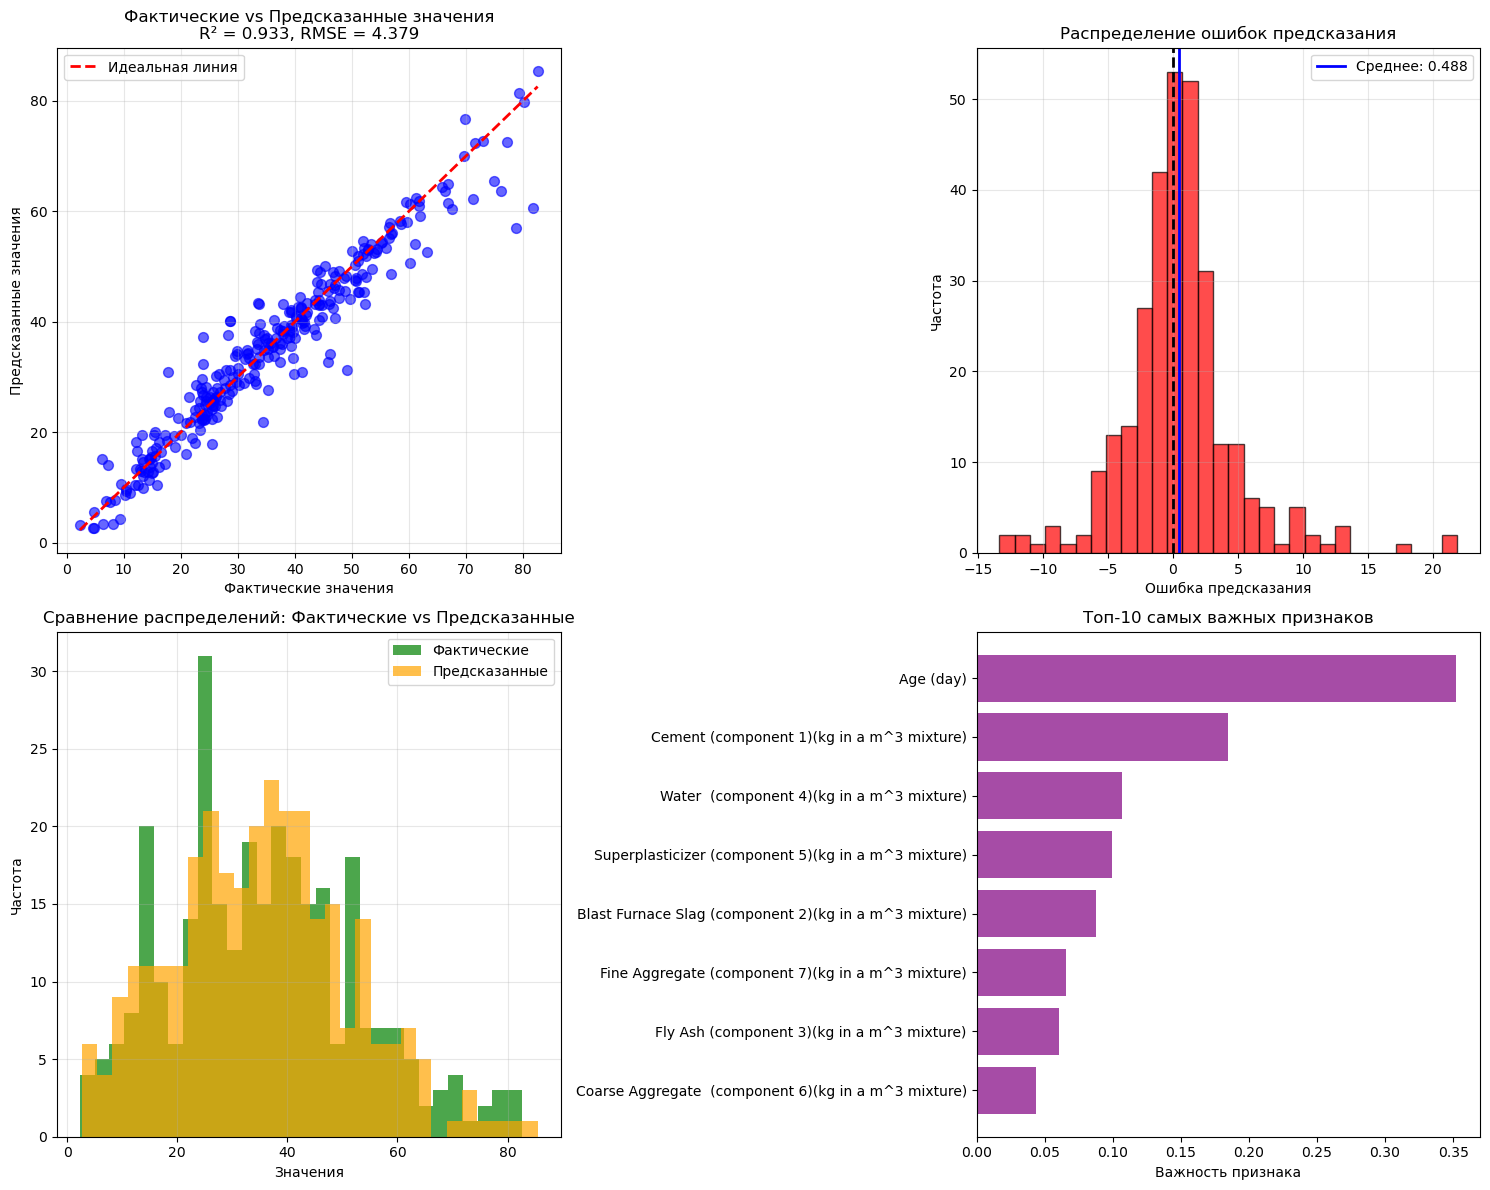

In [ ]:
# Расчет метрик
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("=" * 50)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ МОДЕЛИ")
print("=" * 50)
print(f"R² (коэффициент детерминации): {r2:.4f}")
print(f"RMSE (среднеквадратичная ошибка): {rmse:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae:.4f}")
print(f"MSE (квадратичная ошибка): {mse:.4f}")
print("=" * 50)

# Анализ качества
print("\nАНАЛИЗ КАЧЕСТВА МОДЕЛИ:")
print(f"✓ R² = {r2:.1%} - отличное объяснение дисперсии")
print(f"✓ Точность предсказаний: ±{mae:.2f} единиц в среднем")
print(f"✓ Модель объясняет {r2:.1%} дисперсии целевой переменной")

# Улучшенная визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Фактические vs Предсказанные значения
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, color='blue', s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')
axes[0, 0].set_xlabel('Фактические значения')
axes[0, 0].set_ylabel('Предсказанные значения')
axes[0, 0].set_title(f'Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Распределение ошибок
errors = y_test - y_pred
axes[0, 1].hist(errors, bins=30, alpha=0.7, color='red', edgecolor='black')
axes[0, 1].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[0, 1].axvline(x=errors.mean(), color='blue', linestyle='-', linewidth=2, label=f'Среднее: {errors.mean():.3f}')
axes[0, 1].set_xlabel('Ошибка предсказания')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение ошибок предсказания')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Сравнение распределений
axes[1, 0].hist(y_test, bins=30, alpha=0.7, label='Фактические', color='green')
axes[1, 0].hist(y_pred, bins=30, alpha=0.7, label='Предсказанные', color='orange')
axes[1, 0].set_xlabel('Значения')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Сравнение распределений: Фактические vs Предсказанные')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Важность признаков
feature_importance = best_model.feature_importances_
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
sorted_idx = np.argsort(feature_importance)[-10:]  # Топ-10 признаков

axes[1, 1].barh(range(len(sorted_idx)), feature_importance[sorted_idx], color='purple', alpha=0.7)
axes[1, 1].set_yticks(range(len(sorted_idx)))
axes[1, 1].set_yticklabels([features[i] for i in sorted_idx])
axes[1, 1].set_xlabel('Важность признака')
axes[1, 1].set_title('Топ-10 самых важных признаков')

plt.tight_layout()
plt.show()



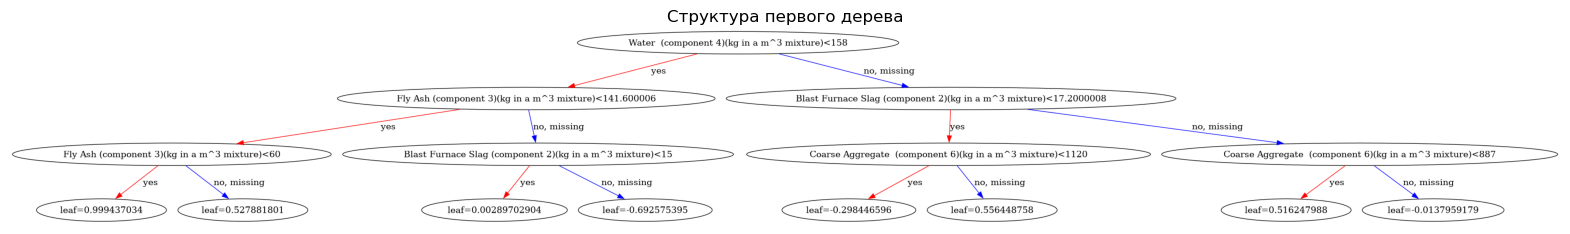

In [ ]:
from xgboost import plot_tree

# Визуализация первого дерева
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(best_model, num_trees=3, ax=ax)
plt.title('Структура первого дерева')
plt.show()


In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Визуализация нескольких конкретных деревьев
trees_to_plot = [1906]  # Номера деревьев для визуализации

for tree_num in trees_to_plot:
    fig, ax = plt.subplots(figsize=(200, 200))
    plot_tree(best_model, num_trees=tree_num, ax=ax)
    plt.title(f'Структура дерева №{tree_num}')
    plt.tight_layout()
    plt.show()

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Визуализация с высоким DPI
trees_to_plot = [0, 1, 2, 3]

for tree_num in trees_to_plot:
    fig, ax = plt.subplots(figsize=(40, 20), dpi=600)  # Увеличиваем DPI
    plot_tree(best_model, num_trees=tree_num, ax=ax)
    
    # Настройка шрифтов
    plt.title(f'Структура дерева №{tree_num}', fontsize=20, pad=20)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# XGBoost имеет встроенную поддержку SHAP
import xgboost as xgb

# Получаем SHAP values напрямую через XGBoost
shap_values_xgb = best_model.get_booster().predict(
    xgb.DMatrix(X_test), 
    pred_contribs=True
)

# Убираем последний столбец (базовое значение)
shap_values = shap_values_xgb[:, :-1]

# Создаем искусственный explainer для визуализации
class SimpleExplainer:
    def __init__(self, shap_values, expected_value):
        self.shap_values = shap_values
        self.expected_value = expected_value

expected_value = shap_values_xgb[0, -1]  # Базовое значение
explainer_simple = SimpleExplainer(shap_values, expected_value)

# Визуализация
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns.tolist())

NameError: name 'shap' is not defined

# Сохраняем лучшую модель

In [ ]:
XGB

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
def remove_all_outliers_iqr(data):
    """
    Удаляет выбросы по всем числовым колонкам используя метод IQR
    """
    original_size = len(data)
    
    # Выбираем только числ

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline
# from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split
# import joblib

# class OutlierRemover(BaseEstimator, TransformerMixin):
#     """
#     Кастомный трансформер для удаления выбросов методом IQR
#     """
#     def __init__(self):
#         self.outlier_indices_ = None
    
#     def fit(self, X, y=None):
#         # В fit мы определяем какие строки являются выбросами
#         self.outlier_indices_ = self._find_outlier_indices(X)
#         return self
    
#     def transform(self, X, y=None):
#         # В transform удаляем выбросы
#         if self.outlier_indices_ is None:
#             return X
        
#         # Удаляем строки с выбросами
#         X_clean = X[~X.index.isin(self.outlier_indices_)].copy()
        
#         if y is not None:
#             y_clean = y[~y.index.isin(self.outlier_indices_)].copy()
#             return X_clean, y_clean
        
#         return X_clean
    
#     def _find_outlier_indices(self, X):
#         """Находит индексы выбросов по всем числовым колонкам"""
#         outlier_indices = set()
        
#         # Работаем только с числовыми колонками
#         numeric_columns = X.select_dtypes(include=[np.number]).columns
        
#         for column in numeric_columns:
#             Q1 = X[column].quantile(0.25)
#             Q3 = X[column].quantile(0.75)
#             IQR = Q3 - Q1
            
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
            
#             # Находим выбросы для текущей колонки
#             column_outliers = X[
#                 (X[column] < lower_bound) | 
#                 (X[column] > upper_bound)
#             ].index
            
#             outlier_indices.update(column_outliers)
        
#         return outlier_indices
    
#     def fit_transform(self, X, y=None, **fit_params):
#         return self.fit(X, y).transform(X, y)

In [ ]:
# from sklearn.pipeline import Pipeline

In [ ]:
# # Создаем пайплайн
# XGB_data_preprocessing = Pipeline([
#     ('outlier_remover', OutlierRemover()),
#     ('xgb_regressor', XGBRegressor(
#         colsample_bytree=0.4603,
#         gamma=0.0468, 
#         learning_rate=0.05,
#         max_depth=3, 
#         min_child_weight=1.7817, n_estimators=2200,
#         reg_alpha=0.4640, reg_lambda=0.8571,
#         subsample=0.5213, silent=1,
#         nthread = -1, verbosity=0))
#         ])



In [ ]:
# import joblib

# #Сохраняем модель
# joblib.dump(XGB, "model.pkl")

# # Сохраняем информацию о фичах (важно для GUI)
# feature_info = {
#     'feature_names': X_train.columns.tolist() if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])],
#     'target_name': 'Concrete compressive strength(MPa, megapascals) '  # Замените на имя вашей целевой переменной
# }

# joblib.dump(feature_info, 'feature_info.pkl')
# print("Информация о фичах сохранена как 'feature_info.pkl'")


# Stacking

In [ ]:
# from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
# from sklearn.base import clone


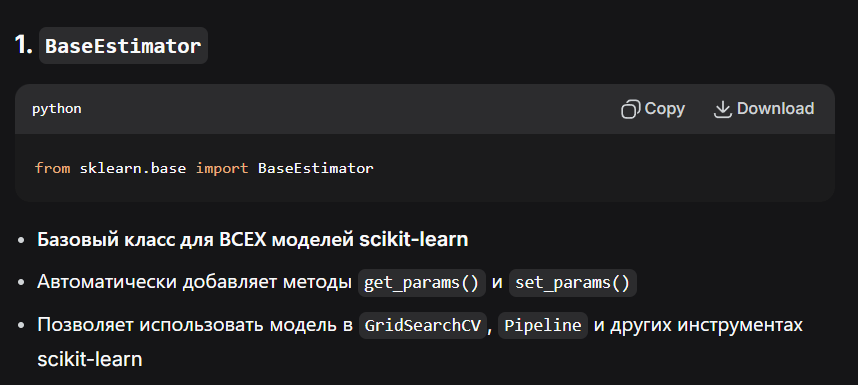

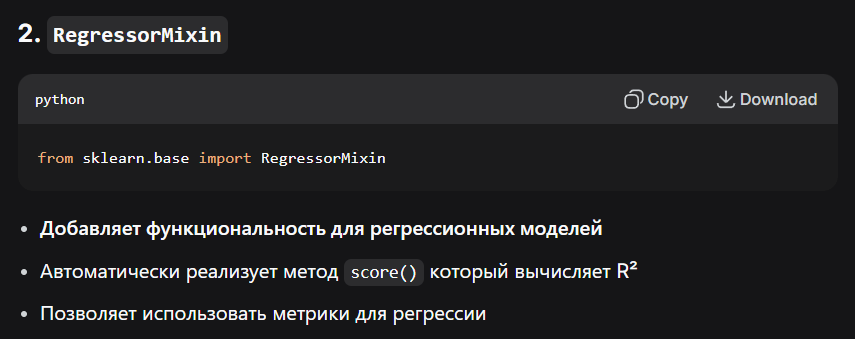

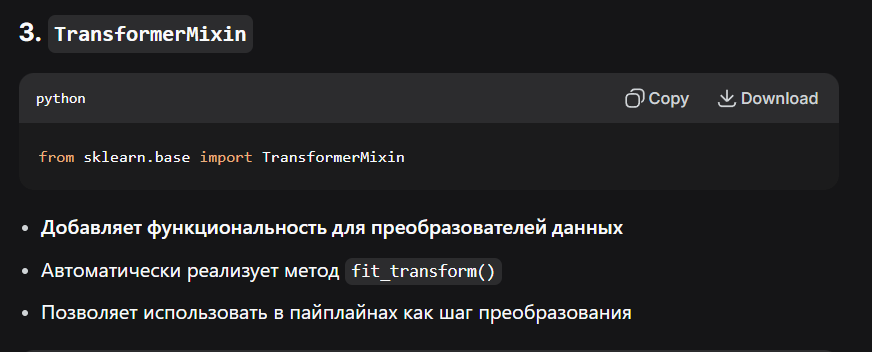

In [ ]:
# class AveragingModelsScore(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, models):
#         self.models = models
        
#     # we define clones of the original models to fit the data in
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
        
#         # Train cloned base models
#         for model in self.models_:
#             model.fit(X, y)

#         return self
    
#     #Now we do the predictions for cloned models and average them
#     def predict(self, X):
#         predictions = np.column_stack([
#             model.predict(X) for model in self.models_
#         ])
#         return np.mean(predictions, axis=1)   

In [ ]:
# averaged_models = AveragingModelsScore(models=(KRR, XGB, LGB))

# score = r2_test(averaged_models, X_train, y_train, X_test, y_test)
# score

In [ ]:

# Создание и обучение модели
averaged_models = AveragingModelsScore(models=(XGB, XGB))

averaged_models.fit(X_train, y_train)
# Предсказания
y_pred = averaged_models.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'LGBM Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'AveragingModelsScore' is not defined

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.utils.validation import check_is_fitted
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

class WeightedAveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, weights=None, auto_weights=True):
        """
        Взвешенный ансамбль моделей
        
        Parameters:
        models: список моделей
        weights: фиксированные веса (если None и auto_weights=False - равные веса)
        auto_weights: автоматически подбирать веса на основе R² каждой модели
        """
        self.models = models
        self.weights = weights
        self.auto_weights = auto_weights
        
    def fit(self, X, y):
        # Создаем клоны моделей
        self.models_ = [clone(model) for model in self.models]
        
        # Обучаем каждую модель
        for model in self.models_:
            model.fit(X, y)
        
        # Автоматический подбор весов на основе производительности
        if self.auto_weights:
            self.weights_ = self._calculate_weights(X, y)
        elif self.weights is not None:
            self.weights_ = np.array(self.weights)
        else:
            # Равные веса по умолчанию
            self.weights_ = np.ones(len(self.models_)) / len(self.models_)
        
        # Нормализуем веса чтобы сумма = 1
        self.weights_ = self.weights_ / np.sum(self.weights_)
        
        self.is_fitted_ = True
        return self
    
    def _calculate_weights(self, X, y):
        """Вычисляет веса на основе R² каждой модели (кросс-валидация)"""
        weights = []
        
        for model in self.models_:
            # Используем кросс-валидацию для оценки производительности
            y_pred_cv = cross_val_predict(model, X, y, cv=5)
            r2 = r2_score(y, y_pred_cv)
            
            # Преобразуем R² в вес (R² может быть отрицательным)
            weight = max(0, r2)  # отрицательные R² получают вес 0
            weights.append(weight)
        
        weights = np.array(weights)
        
        # Если все веса 0, используем равные веса
        if np.sum(weights) == 0:
            weights = np.ones(len(weights))
            
        return weights
    
    def predict(self, X):
        check_is_fitted(self, 'is_fitted_')
        
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        
        # Взвешенное усреднение
        return np.average(predictions, axis=1, weights=self.weights_)
    
    def get_weights_info(self):
        """Возвращает информацию о весах моделей"""
        check_is_fitted(self, 'is_fitted_')
        
        weight_info = []
        for i, (model, weight) in enumerate(zip(self.models, self.weights_)):
            weight_info.append({
                'model': type(model).__name__,
                'weight': round(weight, 4),
                'percentage': round(weight * 100, 2)
            })
        
        return weight_info

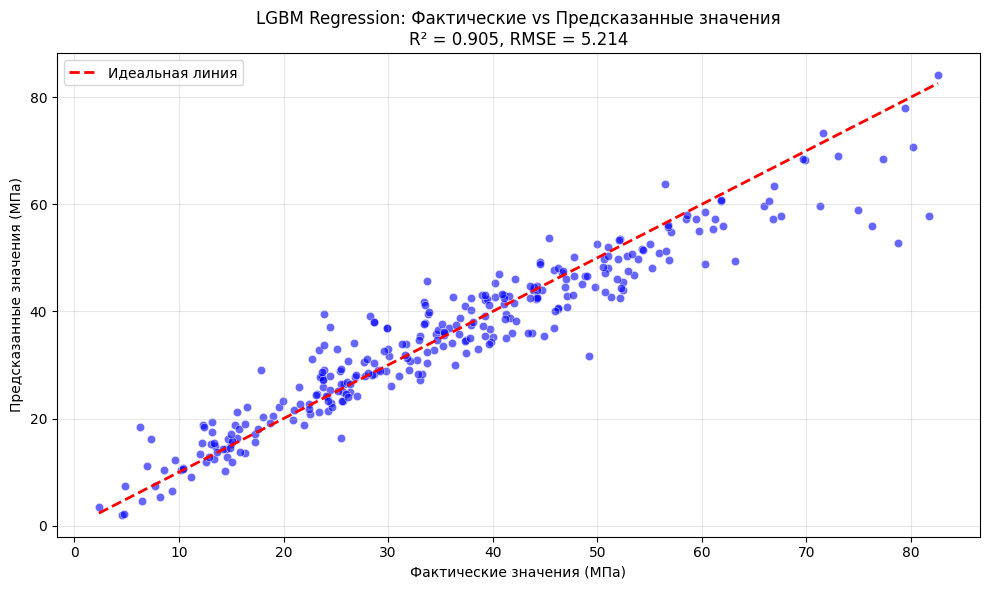

In [ ]:

# Создание и обучение модели
w_averaged_models = WeightedAveragingModels(models=(KRR, XGB, LGB))

w_averaged_models.fit(X_train, y_train)
# Предсказания
y_pred = w_averaged_models.predict(X_test)

# Визуализация с улучшениями
plt.figure(figsize=(10, 6))

# Точечный график предсказаний vs фактические значения
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Идеальная линия')

# Добавляем метрики качества
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.title(f'LGBM Regression: Фактические vs Предсказанные значения\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
plt.xlabel('Фактические значения (МПа)')
plt.ylabel('Предсказанные значения (МПа)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Подавляем предупреждения
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Создаем свою метрику для scoring
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'rmse': make_scorer(rmse_scorer, greater_is_better=False),
    'neg_mean_squared_error': 'neg_mean_squared_error'
}

In [ ]:
# # Параметры для GridSearch (небольшие вариации вокруг ваших значений)
# param_grid_1 = {
#     'learning_rate': [0.04, 0.05, 0.06],
#     'max_depth': [2, 3, 4],
#     'min_child_weight': [1.5, 1.78, 2.0],
#     'gamma': [0.04, 0.046, 0.05],
#     'subsample': [0.5, 0.52, 0.55],
#     'colsample_bytree': [0.45, 0.46, 0.48],
#     'reg_alpha': [0.4, 0.464, 0.5],
#     'reg_lambda': [0.8, 0.857, 0.9],
#     'n_estimators': [2000, 2200, 2500]
# }

# xgb_base = XGBRegressor(
#     nthread=-1,
#     verbosity=0,
#     random_state=42  # добавляем для воспроизводимости
# )

# # GridSearch с кросс-валидацией
# grid_search_1 = GridSearchCV(
#     estimator=xgb_base,
#     param_grid=param_grid_1,
#     scoring='r2',  # или scoring=scoring для нескольких метрик
#     cv=10,
#     n_jobs=-1,
#     verbose=2
# )

# print("🔍 Запускаем GridSearch (это может занять время)...")
# grid_search_1.fit(X_train, y_train)

# print("🏆 Лучшие параметры:")
# print(grid_search_1.best_params_)
# print(f"🎯 Лучший R²: {grid_search_1.best_score_:.4f}")

In [ ]:
# new_XGB = grid_search_1.best_estimator_